In [72]:
### Notes to the graders

# Each of us pulled and cleaned data for 2 months of each top 200 and viral 50 charts --- the data wrangling parts are in separate notebooks for each of us. The code for the collection notebooks will not run without entering your own ID and secert ID for the spotify API. 

# We all worked on separate parts of the graphing and analysis and combined that into one jupyter notebook named "Graphing." This notebook is broken out into sections by name as well, but the code here is runable and the whole notebook is a compilation of how we approached creating our final graphs for the presentation.

# Created csv files are stored in the 'csv files' folder and created/saved graphs are stored in the 'Images' folder.

In [73]:
### Start Tracy

In [74]:
# Import dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sts 
import time
import datetime

In [75]:
# read csv files of viral and top200 sept and nov months combined
csv_path = "csv files\sept_nov_viral_final.csv"
sep_nov_viral_df = pd.read_csv(csv_path)

csv_path2 = "csv files\sept_nov_top200_final.csv"
sep_nov_top200_df = pd.read_csv(csv_path2)


In [76]:
# Check if there are blank genres for viral dataset 
sep_nov_viral_df.count()

# Fill blanks with unspecified
sep_nov_viral_df['Genre 1'].fillna('unspecified', inplace=True)
sep_nov_viral_df['Genre 2'].fillna('unspecified', inplace=True)
sep_nov_viral_df['Genre 3'].fillna('unspecified', inplace=True)

# Check counts to make sure all are the same length
sep_nov_viral_df.count()

# Save dataframe as a csv
sep_nov_viral_df.to_csv('csv files/sep_nov_viral_cleaned_final.csv')

In [77]:
# Check if there are blank genres for top200 dataset
sep_nov_top200_df.count()

# Fill blanks with unspecified
sep_nov_top200_df['Genre 1'].fillna('unspecified', inplace=True)
sep_nov_top200_df['Genre 2'].fillna('unspecified', inplace=True)
sep_nov_top200_df['Genre 3'].fillna('unspecified', inplace=True)

# check counts to make sure all are the same length
sep_nov_top200_df.count()

# Save as csv
sep_nov_top200_df.to_csv('csv files/sep_nov_top200_cleaned_final.csv')


In [78]:
# Filter for only SEPTEMBER

# SEPTEMBER TOP 200
sep_top200 = sep_nov_top200_df.loc[sep_nov_top200_df['Month'] == "September", :]

sep_top200
# SEPTEMBER VIRAL
sep_viral = sep_nov_viral_df.loc[sep_nov_viral_df['Month'] == "September", :]

sep_viral

# Filter for only NOVEMBER

# NOVEMBER TOP 200
nov_top200 = sep_nov_top200_df.loc[sep_nov_top200_df['Month'] == "November", :]

nov_top200

# NOVEMBER VIRAL
nov_viral = sep_nov_viral_df.loc[sep_nov_viral_df['Month'] == "November", :]

nov_viral.head()


,Unnamed: 0,Unnamed: 0.1,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
200,200,0,1,E-GIRLS ARE RUINING MY LIFE!,CORPSE,https://open.spotify.com/track/7bCfHiRcfUjG0YV...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,7yntSJ6uojO3z6GFUVwhAW,viral rap,unspecified,unspecified
201,201,1,2,Trump Is Your President,Bryson Gray,https://open.spotify.com/track/3PdQfXbIuEjUoNl...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,66pGC6EHiiLr7Ce6twM5bk,unspecified,unspecified,unspecified
202,202,2,3,Die Very Rough,Mario Judah,https://open.spotify.com/track/1AyrLa7PkFQvt1A...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,5HFSWl4JPwju06kHxukvTe,meme rap,unspecified,unspecified
203,203,3,4,Touch You,遠野高志,https://open.spotify.com/track/6qWEpnyU43Bcrx3...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,01ACNPPnzgrwcqlbX6eo3x,unspecified,unspecified,unspecified
204,204,4,5,Monster Mash,"Bobby ""Boris"" Pickett",https://open.spotify.com/track/0xxZY5C9xxij3D1...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,42MRYPhQfcEXqb18dl5ERX,halloween,novelty,unspecified


In [79]:
# Simplify the genres for sep viral
sep_genre_df_viral = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(sep_viral[sep_viral['Genre 1'].str.contains('rap|hip hop|trap') | sep_viral['Genre 2'].str.contains('rap|hip hop|trap') | sep_viral['Genre 3'].str.contains('rap|hip hop|trap')]), len(sep_viral[sep_viral['Genre 1'].str.contains('r&b|soul|blues') | sep_viral['Genre 2'].str.contains('r&b|soul|blues') | sep_viral['Genre 3'].str.contains('r&b|soul|blues')]), len(sep_viral[sep_viral['Genre 1'].str.contains('pop') | sep_viral['Genre 2'].str.contains('pop') | sep_viral['Genre 3'].str.contains('pop')]), len(sep_viral[sep_viral['Genre 1'].str.contains('rock') | sep_viral['Genre 2'].str.contains('rock') | sep_viral['Genre 3'].str.contains('rock')]), len(sep_viral[sep_viral['Genre 1'].str.contains('country') | sep_viral['Genre 2'].str.contains('country') | sep_viral['Genre 3'].str.contains('country')]), len(sep_viral[sep_viral['Genre 1'].str.contains('latin') | sep_viral['Genre 2'].str.contains('latin') | sep_viral['Genre 3'].str.contains('latin')]), len(sep_viral[sep_viral['Genre 1'].str.contains('disco') | sep_viral['Genre 2'].str.contains('disco') | sep_viral['Genre 3'].str.contains('disco')]), len(sep_viral[sep_viral['Genre 1'].str.contains('indie') | sep_viral['Genre 2'].str.contains('indie') | sep_viral['Genre 3'].str.contains('indie')]), len(sep_viral[sep_viral['Genre 1'].str.contains('house|edm') | sep_viral['Genre 2'].str.contains('house|edm') | sep_viral['Genre 3'].str.contains('house|edm')]), len(sep_viral[sep_viral['Genre 1'].str.contains('alt|alternative') | sep_viral['Genre 2'].str.contains('alt|alternative') | sep_viral['Genre 3'].str.contains('alt|alternative')]), len(sep_viral[sep_viral['Genre 1'].str.contains('glitchcore') | sep_viral['Genre 2'].str.contains('glitchcore') | sep_viral['Genre 3'].str.contains('glitchcore')]), len(sep_viral[sep_viral['Genre 1'].str.contains('brooklyn drill') | sep_viral['Genre 2'].str.contains('brooklyn drill') | sep_viral['Genre 3'].str.contains('brooklyn drill')]), len(sep_viral[sep_viral['Genre 1'].str.contains('halloween') | sep_viral['Genre 2'].str.contains('halloween') | sep_viral['Genre 3'].str.contains('halloween')]), len(sep_viral[sep_viral['Genre 1'].str.contains('christmas') | sep_viral['Genre 2'].str.contains('christmas') | sep_viral['Genre 3'].str.contains('christmas')]), len(sep_viral[sep_viral['Genre 1'].str.contains('classical') | sep_viral['Genre 2'].str.contains('classical') | sep_viral['Genre 3'].str.contains('classical')])]
}
sep_genre_df_viral = pd.DataFrame(sep_genre_df_viral)
sep_genre_df_viral 
sep_genre_df_viral.to_csv('csv files/sep_SIMPLIFIEDgenre_df_viral.csv')

In [80]:
# Simplify the genres for NOV viral

nov_genre_df_viral = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(nov_viral[nov_viral['Genre 1'].str.contains('rap|hip hop|trap') | nov_viral['Genre 2'].str.contains('rap|hip hop|trap') | nov_viral['Genre 3'].str.contains('rap|hip hop|trap')]), len(nov_viral[nov_viral['Genre 1'].str.contains('r&b|soul|blues') | nov_viral['Genre 2'].str.contains('r&b|soul|blues') | nov_viral['Genre 3'].str.contains('r&b|soul|blues')]), len(nov_viral[nov_viral['Genre 1'].str.contains('pop') | nov_viral['Genre 2'].str.contains('pop') | nov_viral['Genre 3'].str.contains('pop')]), len(nov_viral[nov_viral['Genre 1'].str.contains('rock') | nov_viral['Genre 2'].str.contains('rock') | nov_viral['Genre 3'].str.contains('rock')]), len(nov_viral[nov_viral['Genre 1'].str.contains('country') | nov_viral['Genre 2'].str.contains('country') | nov_viral['Genre 3'].str.contains('country')]), len(nov_viral[nov_viral['Genre 1'].str.contains('latin') | nov_viral['Genre 2'].str.contains('latin') | nov_viral['Genre 3'].str.contains('latin')]), len(nov_viral[nov_viral['Genre 1'].str.contains('disco') | nov_viral['Genre 2'].str.contains('disco') | nov_viral['Genre 3'].str.contains('disco')]), len(nov_viral[nov_viral['Genre 1'].str.contains('indie') | nov_viral['Genre 2'].str.contains('indie') | nov_viral['Genre 3'].str.contains('indie')]), len(nov_viral[nov_viral['Genre 1'].str.contains('house|edm') | nov_viral['Genre 2'].str.contains('house|edm') | nov_viral['Genre 3'].str.contains('house|edm')]), len(nov_viral[nov_viral['Genre 1'].str.contains('alt|alternative') | nov_viral['Genre 2'].str.contains('alt|alternative') | nov_viral['Genre 3'].str.contains('alt|alternative')]), len(nov_viral[nov_viral['Genre 1'].str.contains('glitchcore') | nov_viral['Genre 2'].str.contains('glitchcore') | nov_viral['Genre 3'].str.contains('glitchcore')]), len(nov_viral[nov_viral['Genre 1'].str.contains('brooklyn drill') | nov_viral['Genre 2'].str.contains('brooklyn drill') | nov_viral['Genre 3'].str.contains('brooklyn drill')]), len(nov_viral[nov_viral['Genre 1'].str.contains('halloween') | nov_viral['Genre 2'].str.contains('halloween') | nov_viral['Genre 3'].str.contains('halloween')]), len(nov_viral[nov_viral['Genre 1'].str.contains('christmas') | nov_viral['Genre 2'].str.contains('christmas') | nov_viral['Genre 3'].str.contains('christmas')]), len(nov_viral[nov_viral['Genre 1'].str.contains('classical') | nov_viral['Genre 2'].str.contains('classical') | nov_viral['Genre 3'].str.contains('classical')])]
}
nov_genre_df_viral = pd.DataFrame(nov_genre_df_viral)
nov_genre_df_viral
nov_genre_df_viral.to_csv('csv files/nov_SIMPLIFIEDgenre_df_viral.csv')

In [81]:
# SImplify the genres for sep top 200 

sep_genre_df_top200 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(sep_top200[sep_top200['Genre 1'].str.contains('rap|hip hop|trap') | sep_top200['Genre 2'].str.contains('rap|hip hop|trap') | sep_top200['Genre 3'].str.contains('rap|hip hop|trap')]), len(sep_top200[sep_top200['Genre 1'].str.contains('r&b|soul|blues') | sep_top200['Genre 2'].str.contains('r&b|soul|blues') | sep_top200['Genre 3'].str.contains('r&b|soul|blues')]), len(sep_top200[sep_top200['Genre 1'].str.contains('pop') | sep_top200['Genre 2'].str.contains('pop') | sep_top200['Genre 3'].str.contains('pop')]), len(sep_top200[sep_top200['Genre 1'].str.contains('rock') | sep_top200['Genre 2'].str.contains('rock') | sep_top200['Genre 3'].str.contains('rock')]), len(sep_top200[sep_top200['Genre 1'].str.contains('country') | sep_top200['Genre 2'].str.contains('country') | sep_top200['Genre 3'].str.contains('country')]), len(sep_top200[sep_top200['Genre 1'].str.contains('latin') | sep_top200['Genre 2'].str.contains('latin') | sep_top200['Genre 3'].str.contains('latin')]), len(sep_top200[sep_top200['Genre 1'].str.contains('disco') | sep_top200['Genre 2'].str.contains('disco') | sep_top200['Genre 3'].str.contains('disco')]), len(sep_top200[sep_top200['Genre 1'].str.contains('indie') | sep_top200['Genre 2'].str.contains('indie') | sep_top200['Genre 3'].str.contains('indie')]), len(sep_top200[sep_top200['Genre 1'].str.contains('house|edm') | sep_top200['Genre 2'].str.contains('house|edm') | sep_top200['Genre 3'].str.contains('house|edm')]), len(sep_top200[sep_top200['Genre 1'].str.contains('alt|alternative') | sep_top200['Genre 2'].str.contains('alt|alternative') | sep_top200['Genre 3'].str.contains('alt|alternative')]), len(sep_top200[sep_top200['Genre 1'].str.contains('glitchcore') | sep_top200['Genre 2'].str.contains('glitchcore') | sep_top200['Genre 3'].str.contains('glitchcore')]), len(sep_top200[sep_top200['Genre 1'].str.contains('brooklyn drill') | sep_top200['Genre 2'].str.contains('brooklyn drill') | sep_top200['Genre 3'].str.contains('brooklyn drill')]), len(sep_top200[sep_top200['Genre 1'].str.contains('halloween') | sep_top200['Genre 2'].str.contains('halloween') | sep_top200['Genre 3'].str.contains('halloween')]), len(sep_top200[sep_top200['Genre 1'].str.contains('christmas') | sep_top200['Genre 2'].str.contains('christmas') | sep_top200['Genre 3'].str.contains('christmas')]), len(sep_top200[sep_top200['Genre 1'].str.contains('classical') | sep_top200['Genre 2'].str.contains('classical') | sep_top200['Genre 3'].str.contains('classical')])]
}
sep_genre_df_top200 = pd.DataFrame(sep_genre_df_top200)
sep_genre_df_top200 
sep_genre_df_top200.to_csv('csv files/sep_SIMPLIFIEDgenre_df_top200.csv')

In [82]:
# Simplify the genres for nov top 200

nov_genre_df_top200 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(nov_top200[nov_top200['Genre 1'].str.contains('rap|hip hop|trap') | nov_top200['Genre 2'].str.contains('rap|hip hop|trap') | nov_top200['Genre 3'].str.contains('rap|hip hop|trap')]), len(nov_top200[nov_top200['Genre 1'].str.contains('r&b|soul|blues') | nov_top200['Genre 2'].str.contains('r&b|soul|blues') | nov_top200['Genre 3'].str.contains('r&b|soul|blues')]), len(nov_top200[nov_top200['Genre 1'].str.contains('pop') | nov_top200['Genre 2'].str.contains('pop') | nov_top200['Genre 3'].str.contains('pop')]), len(nov_top200[nov_top200['Genre 1'].str.contains('rock') | nov_top200['Genre 2'].str.contains('rock') | nov_top200['Genre 3'].str.contains('rock')]), len(nov_top200[nov_top200['Genre 1'].str.contains('country') | nov_top200['Genre 2'].str.contains('country') | nov_top200['Genre 3'].str.contains('country')]), len(nov_top200[nov_top200['Genre 1'].str.contains('latin') | nov_top200['Genre 2'].str.contains('latin') | nov_top200['Genre 3'].str.contains('latin')]), len(nov_top200[nov_top200['Genre 1'].str.contains('disco') | nov_top200['Genre 2'].str.contains('disco') | nov_top200['Genre 3'].str.contains('disco')]), len(nov_top200[nov_top200['Genre 1'].str.contains('indie') | nov_top200['Genre 2'].str.contains('indie') | nov_top200['Genre 3'].str.contains('indie')]), len(nov_top200[nov_top200['Genre 1'].str.contains('house|edm') | nov_top200['Genre 2'].str.contains('house|edm') | nov_top200['Genre 3'].str.contains('house|edm')]), len(nov_top200[nov_top200['Genre 1'].str.contains('alt|alternative') | nov_top200['Genre 2'].str.contains('alt|alternative') | nov_top200['Genre 3'].str.contains('alt|alternative')]), len(nov_top200[nov_top200['Genre 1'].str.contains('glitchcore') | nov_top200['Genre 2'].str.contains('glitchcore') | nov_top200['Genre 3'].str.contains('glitchcore')]), len(nov_top200[nov_top200['Genre 1'].str.contains('brooklyn drill') | nov_top200['Genre 2'].str.contains('brooklyn drill') | nov_top200['Genre 3'].str.contains('brooklyn drill')]), len(nov_top200[nov_top200['Genre 1'].str.contains('halloween') | nov_top200['Genre 2'].str.contains('halloween') | nov_top200['Genre 3'].str.contains('halloween')]), len(nov_top200[nov_top200['Genre 1'].str.contains('christmas') | nov_top200['Genre 2'].str.contains('christmas') | nov_top200['Genre 3'].str.contains('christmas')]), len(nov_top200[nov_top200['Genre 1'].str.contains('classical') | nov_top200['Genre 2'].str.contains('classical') | nov_top200['Genre 3'].str.contains('classical')])]
}
nov_genre_df_top200 = pd.DataFrame(nov_genre_df_top200)
nov_genre_df_top200 
nov_genre_df_top200.to_csv('csv files/nov_SIMPLIFIEDgenre_df_top200.csv')

In [83]:
# Combine all top 200 files together

# Set csv paths
csv_path1 = "csv files\\sep_nov_top200_cleaned_final.csv"
csv_path2 = "csv files\\combined_top_200_mayjuly.csv"
csv_path3 = "csv files\\jan_top_200_genres.csv"
csv_path4 = "csv files\\mar_top_200_genres.csv"

# Read with pandas and set as dataframes
nov_sep = pd.read_csv(csv_path1)
nov_sep.count()

may_jul = pd.read_csv(csv_path2)
may_jul.count()

jan = pd.read_csv(csv_path3)
jan.count()

mar = pd.read_csv(csv_path4)
mar.count()

# Concatenate dataframes together into one large dataframe
top200_all_months = pd.concat([nov_sep, may_jul, jan, mar])
top200_all_months = top200_all_months.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
top200_all_months.count()



Unnamed: 0.1.1    1600
Position          4800
Track Name        4800
Artist            4800
Streams           4800
URL               4800
Filename          4800
Month             4800
Week Number       4800
Type              4800
Date              4800
Artist ID         4800
Genre 1           4792
Genre 2           4459
Genre 3           3483
dtype: int64

In [84]:
# Fill blanks with unspecified
top200_all_months['Genre 1'].fillna('unspecified', inplace=True)
top200_all_months['Genre 2'].fillna('unspecified', inplace=True)
top200_all_months['Genre 3'].fillna('unspecified', inplace=True)

top200_all_months.count()

Unnamed: 0.1.1    1600
Position          4800
Track Name        4800
Artist            4800
Streams           4800
URL               4800
Filename          4800
Month             4800
Week Number       4800
Type              4800
Date              4800
Artist ID         4800
Genre 1           4800
Genre 2           4800
Genre 3           4800
dtype: int64

In [85]:
# save to csv
top200_all_months.to_csv('csv files/top200_all_months.csv')

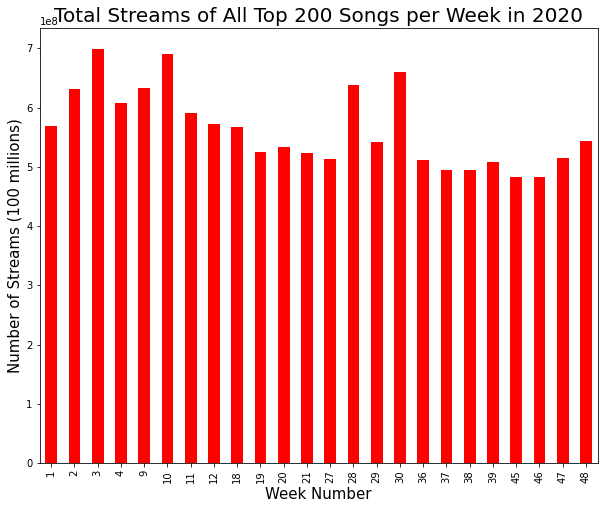

Week Number
1     568732447
2     630848180
3     699004731
4     608490489
9     632716011
10    690261593
11    590879939
12    572606856
18    567969812
19    525600167
20    532625341
21    522477928
27    512651814
28    637517013
29    541592640
30    659279693
36    510979316
37    494926568
38    493853348
39    508319217
45    482611166
46    483252803
47    514674608
48    543690539
Name: Streams, dtype: int64

In [86]:
# Graph the total number of streams per week of top 200 of the selected months of the year
all_months_streaming = top200_all_months.groupby(['Week Number'])['Streams'].sum()
plt.figure(figsize=[10,8])
streaming_week_all = all_months_streaming.plot(kind='bar', color='red')
plt.title("Total Streams of All Top 200 Songs per Week in 2020", fontsize=20)
plt.ylabel("Number of Streams (100 millions)", fontsize=15)
plt.xlabel("Week Number", fontsize=15)
plt.gcf()
plt.savefig("Images/total_streams_per_week.jpeg")
plt.show()

all_months_streaming

In [87]:
# figure out the top 10 artists and their genres for the year
top200_all_months.value_counts("Artist")
top_artist = top200_all_months.groupby(['Artist', 'Genre 1'])['Streams'].sum()
top_artist = top_artist.to_frame(name = "Total Streams").reset_index()
sorted_top_artist = top_artist.sort_values('Total Streams', ascending = False)
top_10_artists = sorted_top_artist.head(10)
top_10_artists 



,Artist,Genre 1,Total Streams
128,Juice WRLD,chicago rap,943007820
164,Lil Uzi Vert,melodic rap,526208143
220,Post Malone,dfw rap,426861976
65,DaBaby,north carolina hip hop,362216760
218,Pop Smoke,brooklyn drill,339572585
230,Roddy Ricch,melodic rap,331020509
25,Bad Bunny,latin,321316516
264,The Weeknd,canadian contemporary r&b,317888246
33,Billie Eilish,electropop,303030965
154,Lil Baby,atl hip hop,291998783


In [88]:
# Use the top ten artist and simplify their genres to combine like genres for graphing later

# Add new column for holding the simplified genre
top_10_artists["Simp Genre"] = ""

# List of key words to use to identify simplified genres
simp_genres = ['rap', 'hip hop', 'r&b', 'pop', 'brooklyn drill', 'latin']

# Loop through rows in dataframe, search for key words, and add simplified genres to specified column
for index, row in top_10_artists.iterrows():
    if simp_genres[0] in row['Genre 1']:
        top_10_artists.loc[index, 'Simp Genre'] = "Rap/Hip Hop/Trap"
    elif simp_genres[1] in row['Genre 1']:
        top_10_artists.loc[index, 'Simp Genre'] = "Rap/Hip Hop/Trap"
    
    if simp_genres[2] in row['Genre 1']:
        top_10_artists.loc[index, 'Simp Genre'] = "R&B/Soul/Blues"
    elif simp_genres[3] in row['Genre 1']:
        top_10_artists.loc[index, 'Simp Genre'] = "Pop"   
    
    if simp_genres[4] in row['Genre 1']:
        top_10_artists.loc[index, 'Simp Genre'] = "Brooklyn Drill"
    elif simp_genres[5] in row['Genre 1']:
        top_10_artists.loc[index, 'Simp Genre'] = "Latin"
    
top_10_artists

<ipython-input-88-2087d8fcbedb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists["Simp Genre"] = ""
C:\Users\ammann-6\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Artist,Genre 1,Total Streams,Simp Genre
128,Juice WRLD,chicago rap,943007820,Rap/Hip Hop/Trap
164,Lil Uzi Vert,melodic rap,526208143,Rap/Hip Hop/Trap
220,Post Malone,dfw rap,426861976,Rap/Hip Hop/Trap
65,DaBaby,north carolina hip hop,362216760,Rap/Hip Hop/Trap
218,Pop Smoke,brooklyn drill,339572585,Brooklyn Drill
230,Roddy Ricch,melodic rap,331020509,Rap/Hip Hop/Trap
25,Bad Bunny,latin,321316516,Latin
264,The Weeknd,canadian contemporary r&b,317888246,R&B/Soul/Blues
33,Billie Eilish,electropop,303030965,Pop
154,Lil Baby,atl hip hop,291998783,Rap/Hip Hop/Trap


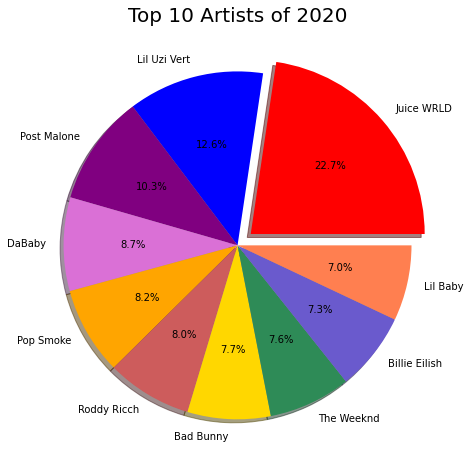

In [89]:
# Make pie chart of top artists and their total streams
plt.figure(figsize=[10,8])
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen', 'maroon', 'purple']
labels = top_10_artists['Artist']
values = top_10_artists['Total Streams']
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Top 10 Artists of 2020", fontsize=20)
plt.savefig("Images/top_ten_artists.png", facecolor = "white")
plt.show()

In [90]:
#Make pie chart of top genres

# summarize the data to combine like simplified genres
top_artist_by_genre = top_10_artists.groupby(['Simp Genre'])['Total Streams'].sum()
top_artist_by_genre =top_artist_by_genre.to_frame(name = "Total Streams").reset_index()
top_artist_by_genre

,Simp Genre,Total Streams
0,Brooklyn Drill,339572585
1,Latin,321316516
2,Pop,303030965
3,R&B/Soul/Blues,317888246
4,Rap/Hip Hop/Trap,2881313991


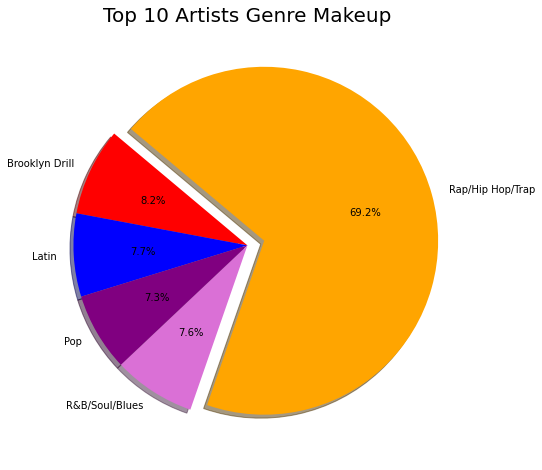

In [91]:
# What do the top 10 artists genres look like?

#Plot the genre by total stream percentages 
plt.figure(figsize=[10,8])
explode = (0, 0, 0, 0, 0.1)
colors = ['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen', 'maroon', 'purple']
labels = top_artist_by_genre['Simp Genre']
values = top_artist_by_genre['Total Streams']
plt.pie(values, explode=explode, labels=labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top 10 Artists Genre Makeup", fontsize=20)
plt.savefig("Images/top_ten_artists_genre.png", facecolor = "white")
plt.show()

In [92]:
#### END Tracy

In [93]:
### Start Amber

In [94]:
# Import dependencies
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import glob
import datetime
import time
import json
import spotipy

In [95]:
# Read csv and set dataframes for graphs

csv_path = "csv files\\jan_viral_50_genres.csv"

jan_viral_50 = pd.read_csv(csv_path)
jan_viral_50.head()

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Unnamed: 0.1,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,NaN,January,2.0,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,NaN,January,2.0,Viral 50,2020-01-09,4Ywiqc8KxAECFoOWWAYry4,NaN,NaN,NaN
2,2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,NaN,January,2.0,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,NaN,NaN
3,3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,NaN,January,2.0,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,NaN
4,4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,NaN,January,2.0,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap


In [96]:
# consolidate genres for jan viral 50

jan_genre_data_50 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('rap|hip hop|trap') | jan_viral_50['Genre 2'].str.contains('rap|hip hop|trap') | jan_viral_50['Genre 3'].str.contains('rap|hip hop|trap')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('r&b|soul|blues') | jan_viral_50['Genre 2'].str.contains('r&b|soul|blues') | jan_viral_50['Genre 3'].str.contains('r&b|soul|blues')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('pop') | jan_viral_50['Genre 2'].str.contains('pop') | jan_viral_50['Genre 3'].str.contains('pop')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('rock') | jan_viral_50['Genre 2'].str.contains('rock') | jan_viral_50['Genre 3'].str.contains('rock')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('country') | jan_viral_50['Genre 2'].str.contains('country') | jan_viral_50['Genre 3'].str.contains('country')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('latin') | jan_viral_50['Genre 2'].str.contains('latin') | jan_viral_50['Genre 3'].str.contains('latin')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('disco') | jan_viral_50['Genre 2'].str.contains('disco') | jan_viral_50['Genre 3'].str.contains('disco')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('indie') | jan_viral_50['Genre 2'].str.contains('indie') | jan_viral_50['Genre 3'].str.contains('indie')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('house|edm') | jan_viral_50['Genre 2'].str.contains('house|edm') | jan_viral_50['Genre 3'].str.contains('house|edm')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('alt|alternative') | jan_viral_50['Genre 2'].str.contains('alt|alternative') | jan_viral_50['Genre 3'].str.contains('alt|alternative')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('glitchcore') | jan_viral_50['Genre 2'].str.contains('glitchcore') | jan_viral_50['Genre 3'].str.contains('glitchcore')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('brooklyn drill') | jan_viral_50['Genre 2'].str.contains('brooklyn drill') | jan_viral_50['Genre 3'].str.contains('brooklyn drill')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('halloween') | jan_viral_50['Genre 2'].str.contains('halloween') | jan_viral_50['Genre 3'].str.contains('halloween')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('christmas') | jan_viral_50['Genre 2'].str.contains('christmas') | jan_viral_50['Genre 3'].str.contains('christmas')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('classical') | jan_viral_50['Genre 2'].str.contains('classical') | jan_viral_50['Genre 3'].str.contains('classical')])]
}

# create new dataframe
jan_genre_df = pd.DataFrame(jan_genre_data_50)

# drop genres with zero counts
zero_counts = jan_genre_df[jan_genre_df['Count'] == 0].index
jan_genre_nozero_df = jan_genre_df.drop(zero_counts)

# show dataframe
jan_genre_nozero_df

,Genre,Count
0,Rap/Hip Hop/Trap,165
1,R&B/Soul/Blues,42
2,Pop,218
3,Rock,8
4,Country,23
5,Latin,15
7,Indie,25
8,House/EDM,14
9,Alternative/Alt,59


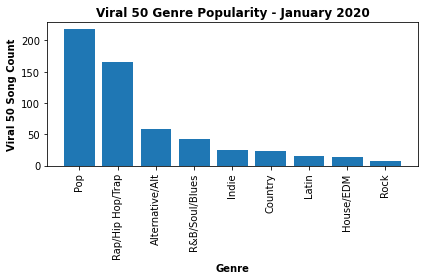

In [97]:
# create bar chart of viral 50 genre popularity - jan 2020

# sort values by count of viral song genre
jan_genre_df_sort = jan_genre_nozero_df.sort_values('Count', ascending=False)

#set x and y axis values
x = jan_genre_df_sort['Genre']
y = jan_genre_df_sort['Count']

# plot the bar chart
plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.title('Viral 50 Genre Popularity - January 2020', weight='bold')
plt.savefig('Images/viral_50_jan_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

In [98]:
# Set up csv files for referred dataframe

csv_path = "csv files\\mar_viral_50_genres.csv"

mar_viral_50 = pd.read_csv(csv_path)
mar_viral_50.head()

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Unnamed: 0.1,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-03-26--2020-03-26.csv,NaN,March,13.0,Viral 50,2020-03-26,3O5HD95HTEPgoPFOjAb7yV,viral rap,NaN,NaN
1,1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-03-26--2020-03-26.csv,NaN,March,13.0,Viral 50,2020-03-26,6bmlMHgSheBauioMgKv2tn,emo rap,sad rap,NaN
2,2,3,Miss Me,Joseph Black,https://open.spotify.com/track/5y6wOadQ0RZfGZk...,viral-us-weekly-2020-03-26--2020-03-26.csv,NaN,March,13.0,Viral 50,2020-03-26,1lmU3giNF3CSbkVSQmLpHQ,tropical house,NaN,NaN
3,3,4,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-03-26--2020-03-26.csv,NaN,March,13.0,Viral 50,2020-03-26,0DbBBj0ScPumRqKXswGQH1,viral rap,NaN,NaN
4,4,5,Supalonely,BENEE,https://open.spotify.com/track/4nK5YrxbMGZstTL...,viral-us-weekly-2020-03-26--2020-03-26.csv,NaN,March,13.0,Viral 50,2020-03-26,0Cp8WN4V8Tu4QJQwCN5Md4,alt z,nz pop,pop


In [99]:
mar_genre_data_50 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('rap|hip hop|trap') | mar_viral_50['Genre 2'].str.contains('rap|hip hop|trap') | mar_viral_50['Genre 3'].str.contains('rap|hip hop|trap')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('r&b|soul|blues') | mar_viral_50['Genre 2'].str.contains('r&b|soul|blues') | mar_viral_50['Genre 3'].str.contains('r&b|soul|blues')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('pop') | mar_viral_50['Genre 2'].str.contains('pop') | mar_viral_50['Genre 3'].str.contains('pop')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('rock') | mar_viral_50['Genre 2'].str.contains('rock') | mar_viral_50['Genre 3'].str.contains('rock')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('country') | mar_viral_50['Genre 2'].str.contains('country') | mar_viral_50['Genre 3'].str.contains('country')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('latin') | mar_viral_50['Genre 2'].str.contains('latin') | mar_viral_50['Genre 3'].str.contains('latin')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('disco') | mar_viral_50['Genre 2'].str.contains('disco') | mar_viral_50['Genre 3'].str.contains('disco')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('indie') | mar_viral_50['Genre 2'].str.contains('indie') | mar_viral_50['Genre 3'].str.contains('indie')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('house|edm') | mar_viral_50['Genre 2'].str.contains('house|edm') | mar_viral_50['Genre 3'].str.contains('house|edm')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('alt|alternative') | mar_viral_50['Genre 2'].str.contains('alt|alternative') | mar_viral_50['Genre 3'].str.contains('alt|alternative')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('glitchcore') | mar_viral_50['Genre 2'].str.contains('glitchcore') | mar_viral_50['Genre 3'].str.contains('glitchcore')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('brooklyn drill') | mar_viral_50['Genre 2'].str.contains('brooklyn drill') | mar_viral_50['Genre 3'].str.contains('brooklyn drill')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('halloween') | mar_viral_50['Genre 2'].str.contains('halloween') | mar_viral_50['Genre 3'].str.contains('halloween')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('christmas') | mar_viral_50['Genre 2'].str.contains('christmas') | mar_viral_50['Genre 3'].str.contains('christmas')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('classical') | mar_viral_50['Genre 2'].str.contains('classical') | mar_viral_50['Genre 3'].str.contains('classical')])]
}

mar_genre_df = pd.DataFrame(mar_genre_data_50)

# drop genres with zero counts
zero_counts = mar_genre_df[mar_genre_df['Count'] == 0].index
mar_genre_nozero_df = mar_genre_df.drop(zero_counts)

mar_genre_nozero_df

,Genre,Count
0,Rap/Hip Hop/Trap,198
1,R&B/Soul/Blues,55
2,Pop,145
3,Rock,9
4,Country,14
5,Latin,14
7,Indie,22
8,House/EDM,22
9,Alternative/Alt,56
11,Brooklyn Drill,15


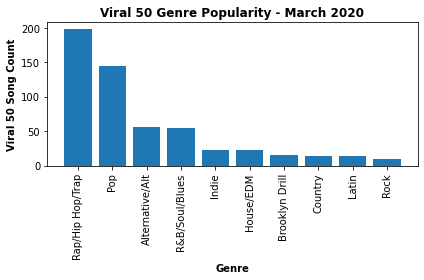

In [100]:
# create bar chart of viral 50 genre popularity - mar 2020
mar_genre_df_sort = mar_genre_nozero_df.sort_values('Count', ascending=False)

x = mar_genre_df_sort['Genre']
y = mar_genre_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.title('Viral 50 Genre Popularity - March 2020', weight='bold')
plt.savefig('Images/viral_50_mar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

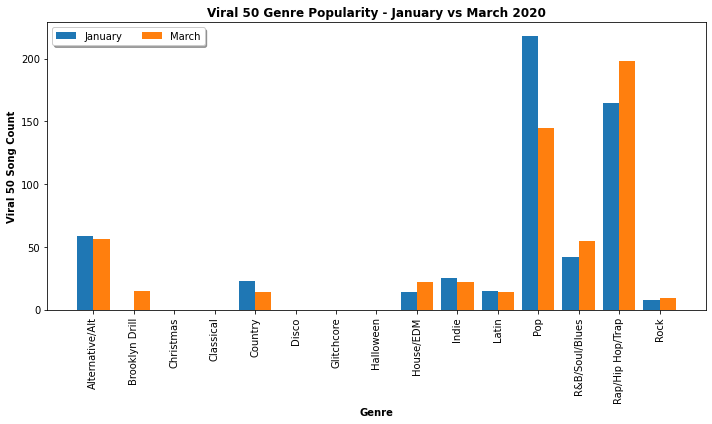

In [101]:
# Create Double Bar Chart for Month-to-Month comparison - Viral 50 - Jan vs Mar

# sort genre alphabetically
jan_genre_df_alpha = jan_genre_df.sort_values('Genre')
mar_genre_df_alpha = mar_genre_df.sort_values('Genre')

# set up plot
fix, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(jan_genre_df_alpha['Genre'].unique()))

# set bar width to be half of typical
bar_width = 0.4

# set bar values
b1 = ax.bar(x, jan_genre_df_alpha['Count'], width=bar_width, label='January')
b2 = ax.bar(x + bar_width, mar_genre_df_alpha['Count'], width=bar_width, label='March')

# set x-axis tick locations and labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(jan_genre_df_alpha['Genre'], rotation=90)

# plot legend
ax.legend(loc='upper left', shadow=True, ncol=2)

# plot titles and axis labels, save figure
plt.title('Viral 50 Genre Popularity - January vs March 2020', weight='bold')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.savefig('Images/viral_50_janvmar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')

# show the chart
plt.tight_layout()
plt.show()

In [102]:
# open csv for referred dataframe

csv_path = "csv files\\jan_top_200_genres.csv"

jan_top_200 = pd.read_csv(csv_path)
jan_top_200.head()

,Unnamed: 0,Unnamed: 0.1,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,0,1,The Box,Roddy Ricch,18952305,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,1,1,2,ROXANNE,Arizona Zervas,9671478,https://open.spotify.com/track/696DnlkuDOXcMAn...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,0vRvGUQVUjytro0xpb26bs,pop rap,rhode island rap,NaN
2,2,2,3,Yummy,Justin Bieber,9648561,https://open.spotify.com/track/41L3O37CECZt3N7...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,1uNFoZAHBGtllmzznpCI3s,canadian pop,pop,post-teen pop
3,3,3,4,Circles,Post Malone,8244725,https://open.spotify.com/track/21jGcNKet2qwijl...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,246dkjvS1zLTtiykXe5h60,dfw rap,melodic rap,rap
4,4,4,5,BOP,DaBaby,7985170,https://open.spotify.com/track/6Ozh9Ok6h4Oi1wU...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,NaN


In [103]:
# consolidate genres for jan top 200

jan_genre_data_200 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(jan_top_200[jan_top_200['Genre 1'].str.contains('rap|hip hop|trap') | jan_top_200['Genre 2'].str.contains('rap|hip hop|trap') | jan_top_200['Genre 3'].str.contains('rap|hip hop|trap')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('r&b|soul|blues') | jan_top_200['Genre 2'].str.contains('r&b|soul|blues') | jan_top_200['Genre 3'].str.contains('r&b|soul|blues')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('pop') | jan_top_200['Genre 2'].str.contains('pop') | jan_top_200['Genre 3'].str.contains('pop')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('rock') | jan_top_200['Genre 2'].str.contains('rock') | jan_top_200['Genre 3'].str.contains('rock')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('country') | jan_top_200['Genre 2'].str.contains('country') | jan_top_200['Genre 3'].str.contains('country')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('latin') | jan_top_200['Genre 2'].str.contains('latin') | jan_top_200['Genre 3'].str.contains('latin')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('disco') | jan_top_200['Genre 2'].str.contains('disco') | jan_top_200['Genre 3'].str.contains('disco')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('indie') | jan_top_200['Genre 2'].str.contains('indie') | jan_top_200['Genre 3'].str.contains('indie')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('house|edm') | jan_top_200['Genre 2'].str.contains('house|edm') | jan_top_200['Genre 3'].str.contains('house|edm')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('alt|alternative') | jan_top_200['Genre 2'].str.contains('alt|alternative') | jan_top_200['Genre 3'].str.contains('alt|alternative')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('glitchcore') | jan_top_200['Genre 2'].str.contains('glitchcore') | jan_top_200['Genre 3'].str.contains('glitchcore')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('brooklyn drill') | jan_top_200['Genre 2'].str.contains('brooklyn drill') | jan_top_200['Genre 3'].str.contains('brooklyn drill')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('halloween') | jan_top_200['Genre 2'].str.contains('halloween') | jan_top_200['Genre 3'].str.contains('halloween')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('christmas') | jan_top_200['Genre 2'].str.contains('christmas') | jan_top_200['Genre 3'].str.contains('christmas')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('classical') | jan_top_200['Genre 2'].str.contains('classical') | jan_top_200['Genre 3'].str.contains('classical')])]
}

jan_genre_200_df = pd.DataFrame(jan_genre_data_200)

# drop genres with zero counts
zero_counts = jan_genre_200_df[jan_genre_200_df['Count'] == 0].index
jan_genre_200_nozero_df = jan_genre_200_df.drop(zero_counts)

jan_genre_200_nozero_df

,Genre,Count
0,Rap/Hip Hop/Trap,517
1,R&B/Soul/Blues,51
2,Pop,380
3,Rock,5
4,Country,32
5,Latin,13
7,Indie,4
8,House/EDM,29
9,Alternative/Alt,43
11,Brooklyn Drill,6


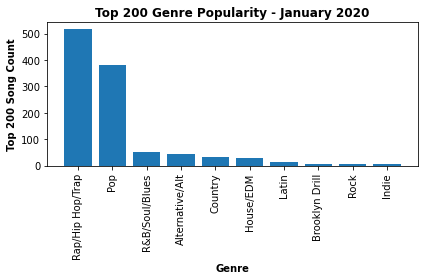

In [104]:
# create bar chart of top 200 genre popularity - jan 2020
jan_genre_200_df_sort = jan_genre_200_nozero_df.sort_values('Count', ascending=False)

x = jan_genre_200_df_sort['Genre']
y = jan_genre_200_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Top 200 Song Count', weight='bold')
plt.title('Top 200 Genre Popularity - January 2020', weight='bold')
plt.savefig('Images/top_200_jan_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

In [105]:
# pull from csv file to refer to correct dataframe
csv_path = "csv files/mar_top_200_genres.csv"

mar_top_200 = pd.read_csv(csv_path)
mar_top_200.head()

,Unnamed: 0,Unnamed: 0.1,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,0,1,The Box,Roddy Ricch,15264900,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,1,1,2,Blinding Lights,The Weeknd,8663011,https://open.spotify.com/track/0sf12qNH5qcw8qp...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,canadian pop,pop
2,2,2,3,Say So,Doja Cat,8494545,https://open.spotify.com/track/3Dv1eDb0MEgF93G...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,5cj0lLjcoR7YOSnhnX0Po5,dance pop,pop,pop rap
3,3,3,4,Blueberry Faygo,Lil Mosey,8366456,https://open.spotify.com/track/22LAwLoDA5b4AaG...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,5zctI4wO9XSKS8XwcnqEHk,melodic rap,rap,rap conscient
4,4,4,5,Intentions (feat. Quavo),Justin Bieber,8139379,https://open.spotify.com/track/4umIPjkehX1r7uh...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,1uNFoZAHBGtllmzznpCI3s,canadian pop,pop,post-teen pop


In [106]:
# consolidate genres for mar top 200

mar_genre_data_200 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(mar_top_200[mar_top_200['Genre 1'].str.contains('rap|hip hop|trap') | mar_top_200['Genre 2'].str.contains('rap|hip hop|trap') | mar_top_200['Genre 3'].str.contains('rap|hip hop|trap')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('r&b|soul|blues') | mar_top_200['Genre 2'].str.contains('r&b|soul|blues') | mar_top_200['Genre 3'].str.contains('r&b|soul|blues')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('pop') | mar_top_200['Genre 2'].str.contains('pop') | mar_top_200['Genre 3'].str.contains('pop')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('rock') | mar_top_200['Genre 2'].str.contains('rock') | mar_top_200['Genre 3'].str.contains('rock')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('country') | mar_top_200['Genre 2'].str.contains('country') | mar_top_200['Genre 3'].str.contains('country')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('latin') | mar_top_200['Genre 2'].str.contains('latin') | mar_top_200['Genre 3'].str.contains('latin')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('disco') | mar_top_200['Genre 2'].str.contains('disco') | mar_top_200['Genre 3'].str.contains('disco')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('indie') | mar_top_200['Genre 2'].str.contains('indie') | mar_top_200['Genre 3'].str.contains('indie')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('house|edm') | mar_top_200['Genre 2'].str.contains('house|edm') | mar_top_200['Genre 3'].str.contains('house|edm')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('alt|alternative') | mar_top_200['Genre 2'].str.contains('alt|alternative') | mar_top_200['Genre 3'].str.contains('alt|alternative')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('glitchcore') | mar_top_200['Genre 2'].str.contains('glitchcore') | mar_top_200['Genre 3'].str.contains('glitchcore')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('brooklyn drill') | mar_top_200['Genre 2'].str.contains('brooklyn drill') | mar_top_200['Genre 3'].str.contains('brooklyn drill')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('halloween') | mar_top_200['Genre 2'].str.contains('halloween') | mar_top_200['Genre 3'].str.contains('halloween')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('christmas') | mar_top_200['Genre 2'].str.contains('christmas') | mar_top_200['Genre 3'].str.contains('christmas')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('classical') | mar_top_200['Genre 2'].str.contains('classical') | mar_top_200['Genre 3'].str.contains('classical')])]
}

mar_genre_200_df = pd.DataFrame(mar_genre_data_200)

# drop genres with zero counts
zero_counts = mar_genre_200_df[mar_genre_200_df['Count'] == 0].index
mar_genre_200_nozero_df = mar_genre_200_df.drop(zero_counts)

mar_genre_200_nozero_df

,Genre,Count
0,Rap/Hip Hop/Trap,522
1,R&B/Soul/Blues,59
2,Pop,337
3,Rock,4
4,Country,30
5,Latin,67
7,Indie,10
8,House/EDM,27
9,Alternative/Alt,40
11,Brooklyn Drill,10


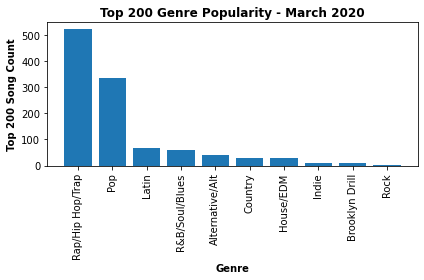

In [107]:
# create bar chart of top 200 genre popularity - mar 2020
mar_genre_200_df_sort = mar_genre_200_nozero_df.sort_values('Count', ascending=False)

x = mar_genre_200_df_sort['Genre']
y = mar_genre_200_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Top 200 Song Count', weight='bold')
plt.title('Top 200 Genre Popularity - March 2020', weight='bold')
plt.savefig('Images/top_200_mar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

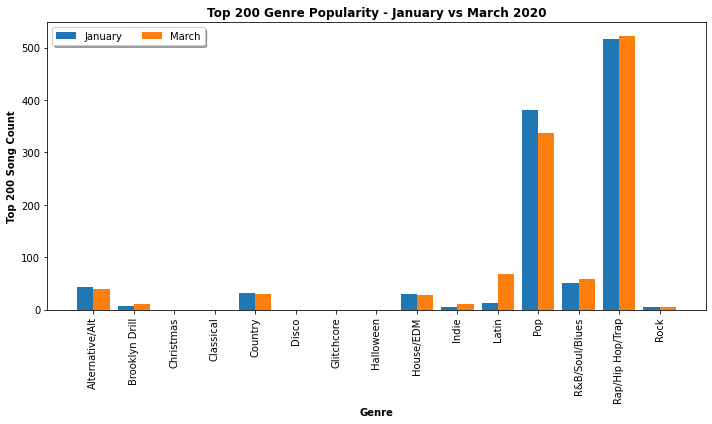

In [108]:
# Create Double Bar Chart for Month-to-Month comparison - Top 200 - Jan vs Mar

# sort genre alphabetically
jan_genre_200_df_alpha = jan_genre_200_df.sort_values('Genre')
mar_genre_200_df_alpha = mar_genre_200_df.sort_values('Genre')

# set up plot
fix, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(jan_genre_200_df_alpha['Genre'].unique()))

# set bar width to be half of typical
bar_width = 0.4

# set bar values
b1 = ax.bar(x, jan_genre_200_df_alpha['Count'], width=bar_width, label='January')
b2 = ax.bar(x + bar_width, mar_genre_200_df_alpha['Count'], width=bar_width, label='March')

# set x-axis tick locations and labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(jan_genre_200_df_alpha['Genre'], rotation=90)

# plot legend
ax.legend(loc='upper left', shadow=True, ncol=2)

# plot titles and axis labels, save figure
plt.title('Top 200 Genre Popularity - January vs March 2020', weight='bold')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Top 200 Song Count', weight='bold')
plt.savefig('Images/top_200_janvmar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')

# show the chart
plt.tight_layout()
plt.show()

In [109]:
# Create multiple bar chart to compare viral 50 genre popularity across all months

#read csvs from other group member months
may_genre_df = pd.read_csv('csv files\\may_viral_50_genres.csv')
jul_genre_df = pd.read_csv('csv files\\jul_viral_50_genres.csv')
sep_genre_df = pd.read_csv('csv files\\sep_viral_50_genres.csv')
nov_genre_df = pd.read_csv('csv files\\nov_viral_50_genres.csv')

# sort genre alphabetically
jan_genre_df_alpha = jan_genre_df.sort_values('Genre')
mar_genre_df_alpha = mar_genre_df.sort_values('Genre')
may_genre_df_alpha = may_genre_df.sort_values('Genre')
jul_genre_df_alpha = jul_genre_df.sort_values('Genre')
sep_genre_df_alpha = sep_genre_df.sort_values('Genre')
nov_genre_df_alpha = nov_genre_df.sort_values('Genre')

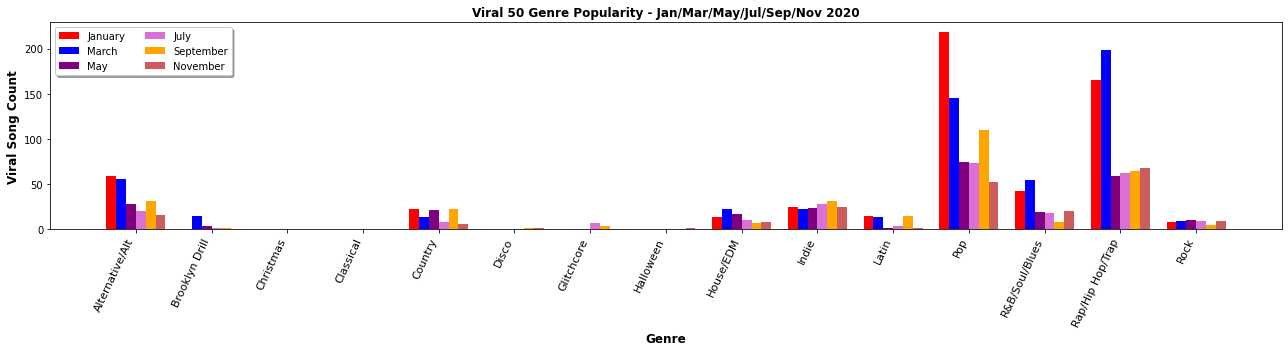

In [110]:
# plot multiple bar chart
# set up plot
fix, ax = plt.subplots(figsize=(18,5))
x = np.arange(len(jan_genre_df_alpha['Genre'].unique()))

# set bar width
width = 0.13

# set bar values
b1 = ax.bar(x, jan_genre_df_alpha['Count'], width=width, color='red', label='January')
b2 = ax.bar(x + width, mar_genre_df_alpha['Count'], width=width, color='blue', label='March')
b3 = ax.bar(x + width*2, may_genre_df_alpha['Count'], width=width, color='purple', label='May')
b4 = ax.bar(x + width*3, jul_genre_df_alpha['Count'], width=width, color='orchid', label='July')
b5 = ax.bar(x + width*4, sep_genre_df_alpha['Count'], width=width, color='orange', label='September')
b6 = ax.bar(x + width*5, nov_genre_df_alpha['Count'], width=width, color='indianred', label='November')

# set x-axis tick locations and labels
ax.set_xticks(x + width*2.5)
ax.set_xticklabels(jan_genre_df_alpha['Genre'], rotation=65, ha='right', fontsize=11)

# plot legend
ax.legend(loc='upper left', shadow=True, ncol=2)

# plot titles and axis labels, save figure
plt.title('Viral 50 Genre Popularity - Jan/Mar/May/Jul/Sep/Nov 2020', weight='bold')
plt.xlabel('Genre', weight='bold', fontsize=12)
plt.ylabel('Viral Song Count', weight='bold', fontsize=12)
plt.savefig('Images/viral_50_allmonths_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')

# show the chart
plt.tight_layout()
plt.show()

In [111]:
# Create multiple bar chart to compare top 200 genre popularity across all months

#read csvs from other group member months
may_genre_200_df = pd.read_csv('csv files\\may_top_200_genres.csv')
jul_genre_200_df = pd.read_csv('csv files\\july_top_200_genres.csv')
sep_genre_200_df = pd.read_csv('csv files\\sep_top_200_genres.csv')
nov_genre_200_df = pd.read_csv('csv files\\nov_top_200_genres.csv')

# sort genre alphabetically
jan_genre_df_200_alpha = jan_genre_df.sort_values('Genre')
mar_genre_df_200_alpha = mar_genre_df.sort_values('Genre')
may_genre_df_200_alpha = may_genre_df.sort_values('Genre')
jul_genre_df_200_alpha = jul_genre_df.sort_values('Genre')
sep_genre_df_200_alpha = sep_genre_df.sort_values('Genre')
nov_genre_df_200_alpha = nov_genre_df.sort_values('Genre')

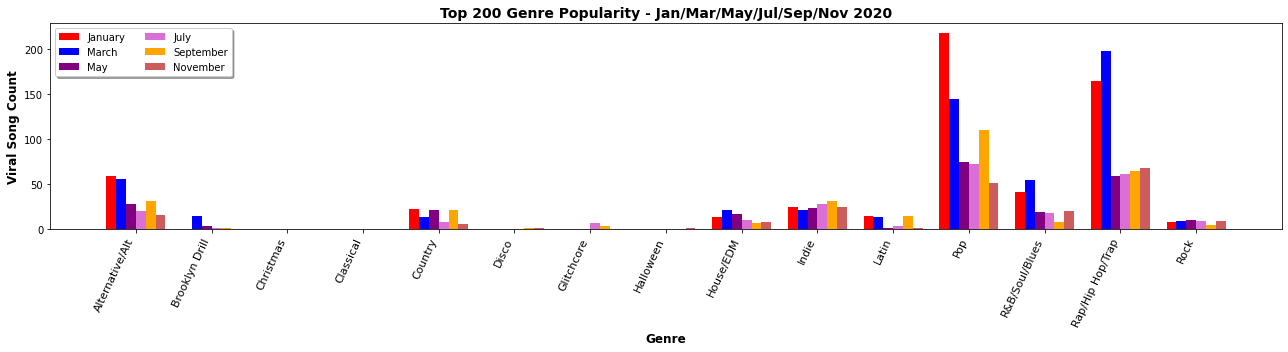

In [112]:
# plot multiple bar chart
# set up plot

fix, ax = plt.subplots(figsize=(18,5))
x = np.arange(len(jan_genre_200_df_alpha['Genre'].unique()))

# set bar width
width = 0.13

# set bar values
b1 = ax.bar(x, jan_genre_df_200_alpha['Count'], width=width, color='red', label='January')
b2 = ax.bar(x + width, mar_genre_df_200_alpha['Count'], width=width, color='blue', label='March')
b3 = ax.bar(x + width*2, may_genre_df_200_alpha['Count'], width=width, color='purple', label='May')
b4 = ax.bar(x + width*3, jul_genre_df_200_alpha['Count'], width=width, color='orchid', label='July')
b5 = ax.bar(x + width*4, sep_genre_df_200_alpha['Count'], width=width, color='orange', label='September')
b6 = ax.bar(x + width*5, nov_genre_df_200_alpha['Count'], width=width, color='indianred', label='November')

# set x-axis tick locations and labels
ax.set_xticks(x + width*2.5)
ax.set_xticklabels(jan_genre_200_df_alpha['Genre'], rotation=65, ha='right', fontsize=11)

# plot legend
ax.legend(loc='upper left', shadow=True, ncol=2)

# plot titles and axis labels, save figure
plt.title('Top 200 Genre Popularity - Jan/Mar/May/Jul/Sep/Nov 2020', weight='bold', fontsize=14)
plt.xlabel('Genre', weight='bold', fontsize=12)
plt.ylabel('Viral Song Count', weight='bold', fontsize=12)
plt.savefig('Images/top_200_allmonths_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')

# show the chart
plt.tight_layout()
plt.show()

In [113]:
### End Amber

In [114]:
## Start Rosa

In [115]:
# Visualizations: Histograms/Bar Graphs for Top Viral Songs

In [116]:
# Create and clean dataframes. Plethora of odd genres unified into more general categories (original genre name from API reques was used as guide)

In [117]:
import datetime
import glob
import os
import pandas as pd
import json
import time
import numpy as np
import spotipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [118]:
viral_all_df = pd.read_csv('csv files\\viral_all.csv')
viral_all_df.head()

,Unnamed: 0,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,NaN
2,2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,19FsxZm98evcrjWFFhHnC4,unspecified,NaN,NaN
3,3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap
4,4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,NaN,NaN


In [119]:
new_viral_all_df=viral_all_df.drop(["Unnamed: 0"], axis=1)
new_viral_all_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,NaN
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,19FsxZm98evcrjWFFhHnC4,unspecified,NaN,NaN
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,NaN,NaN


In [120]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('rap|hip hop|trap') | new_viral_all_df['Genre 2'].str.contains('rap|hip hop|trap') | new_viral_all_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('r&b|soul|blues') | new_viral_all_df['Genre 2'].str.contains('r&b|soul|blues') | new_viral_all_df['Genre 3'].str.contains('r&b|soul|blues')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('pop') | new_viral_all_df['Genre 2'].str.contains('pop') | new_viral_all_df['Genre 3'].str.contains('pop')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('rock') | new_viral_all_df['Genre 2'].str.contains('rock') | new_viral_all_df['Genre 3'].str.contains('rock')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('country') | new_viral_all_df['Genre 2'].str.contains('country') | new_viral_all_df['Genre 3'].str.contains('country')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('latin') | new_viral_all_df['Genre 2'].str.contains('latin') | new_viral_all_df['Genre 3'].str.contains('latin')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('disco') | new_viral_all_df['Genre 2'].str.contains('disco') | new_viral_all_df['Genre 3'].str.contains('disco')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('indie') | new_viral_all_df['Genre 2'].str.contains('indie') | new_viral_all_df['Genre 3'].str.contains('indie')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('house|edm') | new_viral_all_df['Genre 2'].str.contains('house|edm') | new_viral_all_df['Genre 3'].str.contains('house|edm')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('alt|alternative') | new_viral_all_df['Genre 2'].str.contains('alt|alternative') | new_viral_all_df['Genre 3'].str.contains('alt|alternative')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('glitchcore') | new_viral_all_df['Genre 2'].str.contains('glitchcore') | new_viral_all_df['Genre 3'].str.contains('glitchcore')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('brooklyn drill') | new_viral_all_df['Genre 2'].str.contains('brooklyn drill') | new_viral_all_df['Genre 3'].str.contains('brooklyn drill')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('halloween') | new_viral_all_df['Genre 2'].str.contains('halloween') | new_viral_all_df['Genre 3'].str.contains('halloween')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('christmas') | new_viral_all_df['Genre 2'].str.contains('christmas') | new_viral_all_df['Genre 3'].str.contains('christmas')]), len(new_viral_all_df[new_viral_all_df['Genre 1'].str.contains('classical') | new_viral_all_df['Genre 2'].str.contains('classical') | new_viral_all_df['Genre 3'].str.contains('classical')])]
}
all_viral_genre_df = pd.DataFrame(genre_data)
all_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,433
1,R&B/Soul/Blues,111
2,Pop,495
3,Rock,43
4,Country,84


In [121]:
max_count = all_viral_genre_df['Count'].max()
print(max_count)
percent_total_max = (max_count/all_viral_genre_df['Count'].sum())*100
print(percent_total_max)

495
31.54875717017208


In [122]:
all_viral_genre_df['Percent']=(all_viral_genre_df['Count']/all_viral_genre_df['Count'].sum())*100

In [123]:
all_viral_genre_df

,Genre,Count,Percent
0,Rap/Hip Hop/Trap,433,27.597196
1,R&B/Soul/Blues,111,7.074570
2,Pop,495,31.548757
3,Rock,43,2.740599
4,Country,84,5.353728
5,Latin,35,2.230720
6,Disco,2,0.127470
7,Indie,136,8.667941
8,House/EDM,56,3.569152
9,Alternative/Alt,150,9.560229


In [124]:
sorted_all_viral_genre_df = all_viral_genre_df.sort_values('Count', ascending=False)

In [125]:
# Top Viral Genres Distribution Throughout 2020 (Sampled Months)

In [126]:
# Assign specific colors to genres

In [127]:
genres = ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical']
colors = ['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen', 'maroon', 'purple']

In [128]:
genres_all = sorted_all_viral_genre_df['Genre'].tolist()
all_colors = []

for x in genres_all:
    if x == genres[0]:
        all_colors.append(colors[0])
    if x == genres[1]:
        all_colors.append(colors[1])
    if x == genres[2]:
        all_colors.append(colors[2])      
    if x == genres[3]:
        all_colors.append(colors[3]) 
    if x == genres[4]:
        all_colors.append(colors[4])
    if x == genres[5]:
        all_colors.append(colors[5])
    if x == genres[6]:
        all_colors.append(colors[6])
    if x == genres[7]:
        all_colors.append(colors[7]) 
    if x == genres[8]:
        all_colors.append(colors[8])
    if x == genres[9]:
        all_colors.append(colors[9])
    if x == genres[10]:
        all_colors.append(colors[10])
    if x == genres[11]:
        all_colors.append(colors[11])
    if x == genres[12]:
        all_colors.append(colors[12])
    if x == genres[13]:
        all_colors.append(colors[13])
    if x == genres[14]:
        all_colors.append(colors[14])

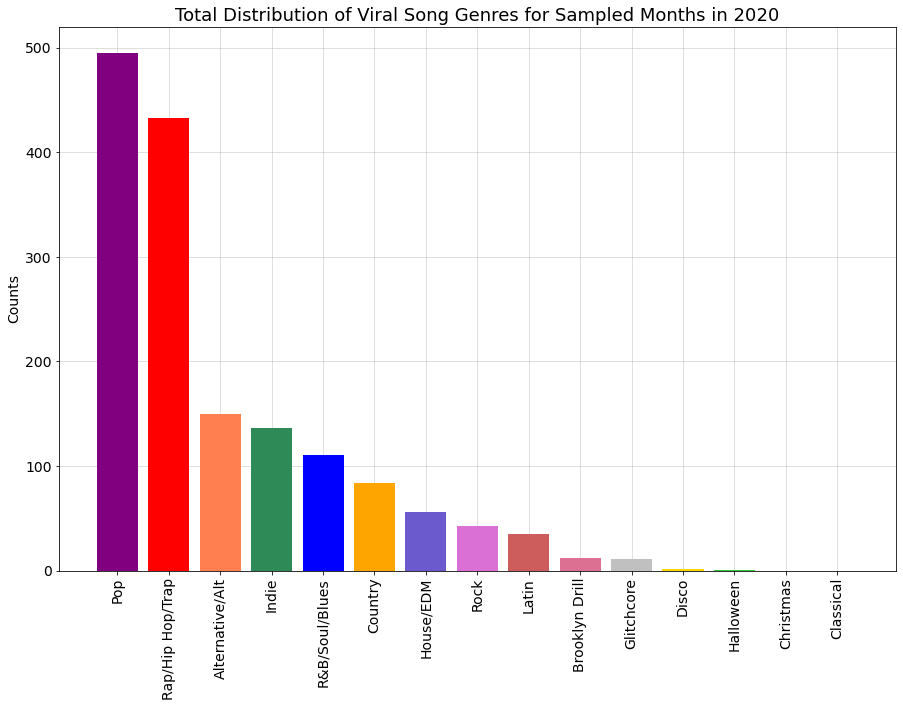

In [129]:
names = sorted_all_viral_genre_df['Genre']
values = sorted_all_viral_genre_df['Count'].astype(float)

plt.bar(names, values, color=all_colors, zorder=2)
plt.xticks(rotation=90, size=14)
plt.grid(alpha=0.5, zorder=0)
plt.yticks(size=14)
plt.ylabel("Counts", size=14)
plt.title("Total Distribution of Viral Song Genres for Sampled Months in 2020", size=18)

plt.gcf().set_size_inches(15,10)
plt.savefig('Images/total_all_viral_genre.jpg', facecolor='w')
plt.show()

In [130]:
# Distribution of Genres per Month

# Create and clean dataframes. Plethora of odd genres unified into more general categories (original genre name from API reques was used as guide)

In [131]:
jan_df = new_viral_all_df[new_viral_all_df['Month'] == 'January']
jan_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,NaN
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,19FsxZm98evcrjWFFhHnC4,unspecified,NaN,NaN
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,NaN,NaN


In [132]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(jan_df[jan_df['Genre 1'].str.contains('rap|hip hop|trap') | jan_df['Genre 2'].str.contains('rap|hip hop|trap') | jan_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(jan_df[jan_df['Genre 1'].str.contains('r&b|soul|blues') | jan_df['Genre 2'].str.contains('r&b|soul|blues') | jan_df['Genre 3'].str.contains('r&b|soul|blues')]), len(jan_df[jan_df['Genre 1'].str.contains('pop') | jan_df['Genre 2'].str.contains('pop') | jan_df['Genre 3'].str.contains('pop')]), len(jan_df[jan_df['Genre 1'].str.contains('rock') | jan_df['Genre 2'].str.contains('rock') | jan_df['Genre 3'].str.contains('rock')]), len(jan_df[jan_df['Genre 1'].str.contains('country') | jan_df['Genre 2'].str.contains('country') | jan_df['Genre 3'].str.contains('country')]), len(jan_df[jan_df['Genre 1'].str.contains('latin') | jan_df['Genre 2'].str.contains('latin') | jan_df['Genre 3'].str.contains('latin')]), len(jan_df[jan_df['Genre 1'].str.contains('disco') | jan_df['Genre 2'].str.contains('disco') | jan_df['Genre 3'].str.contains('disco')]), len(jan_df[jan_df['Genre 1'].str.contains('indie') | jan_df['Genre 2'].str.contains('indie') | jan_df['Genre 3'].str.contains('indie')]), len(jan_df[jan_df['Genre 1'].str.contains('house|edm') | jan_df['Genre 2'].str.contains('house|edm') | jan_df['Genre 3'].str.contains('house|edm')]), len(jan_df[jan_df['Genre 1'].str.contains('alt|alternative') | jan_df['Genre 2'].str.contains('alt|alternative') | jan_df['Genre 3'].str.contains('alt|alternative')]), len(jan_df[jan_df['Genre 1'].str.contains('glitchcore') | jan_df['Genre 2'].str.contains('glitchcore') | jan_df['Genre 3'].str.contains('glitchcore')]), len(jan_df[jan_df['Genre 1'].str.contains('brooklyn drill') | jan_df['Genre 2'].str.contains('brooklyn drill') | jan_df['Genre 3'].str.contains('brooklyn drill')]), len(jan_df[jan_df['Genre 1'].str.contains('halloween') | jan_df['Genre 2'].str.contains('halloween') | jan_df['Genre 3'].str.contains('halloween')]), len(jan_df[jan_df['Genre 1'].str.contains('christmas') | jan_df['Genre 2'].str.contains('christmas') | jan_df['Genre 3'].str.contains('christmas')]), len(jan_df[jan_df['Genre 1'].str.contains('classical') | jan_df['Genre 2'].str.contains('classical') | jan_df['Genre 3'].str.contains('classical')])]
}
jan_viral_genre_df = pd.DataFrame(genre_data)
jan_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,87
1,R&B/Soul/Blues,22
2,Pop,105
3,Rock,4
4,Country,11


In [133]:
sorted_jan_viral_genre_df = jan_viral_genre_df.sort_values('Count', ascending=False)
sorted_jan_viral_genre_df.head()

,Genre,Count
2,Pop,105
0,Rap/Hip Hop/Trap,87
9,Alternative/Alt,28
1,R&B/Soul/Blues,22
7,Indie,13


In [134]:
mar_df = new_viral_all_df[new_viral_all_df['Month'] == 'March']
mar_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
200,1,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,3O5HD95HTEPgoPFOjAb7yV,viral rap,NaN,NaN
201,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,1lmU3giNF3CSbkVSQmLpHQ,tropical house,NaN,NaN
202,3,Miss Me,Joseph Black,https://open.spotify.com/track/5y6wOadQ0RZfGZk...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,7sPFCTilT1dZsqcDXzOiQf,viral rap,NaN,NaN
203,4,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,6bmlMHgSheBauioMgKv2tn,emo rap,sad rap,NaN
204,5,Supalonely,BENEE,https://open.spotify.com/track/4nK5YrxbMGZstTL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,0Cp8WN4V8Tu4QJQwCN5Md4,alt z,nz pop,pop


In [135]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(mar_df[mar_df['Genre 1'].str.contains('rap|hip hop|trap') | mar_df['Genre 2'].str.contains('rap|hip hop|trap') | mar_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(mar_df[mar_df['Genre 1'].str.contains('r&b|soul|blues') | mar_df['Genre 2'].str.contains('r&b|soul|blues') | mar_df['Genre 3'].str.contains('r&b|soul|blues')]), len(mar_df[mar_df['Genre 1'].str.contains('pop') | mar_df['Genre 2'].str.contains('pop') | mar_df['Genre 3'].str.contains('pop')]), len(mar_df[mar_df['Genre 1'].str.contains('rock') | mar_df['Genre 2'].str.contains('rock') | mar_df['Genre 3'].str.contains('rock')]), len(mar_df[mar_df['Genre 1'].str.contains('country') | mar_df['Genre 2'].str.contains('country') | mar_df['Genre 3'].str.contains('country')]), len(mar_df[mar_df['Genre 1'].str.contains('latin') | mar_df['Genre 2'].str.contains('latin') | mar_df['Genre 3'].str.contains('latin')]), len(mar_df[mar_df['Genre 1'].str.contains('disco') | mar_df['Genre 2'].str.contains('disco') | mar_df['Genre 3'].str.contains('disco')]), len(mar_df[mar_df['Genre 1'].str.contains('indie') | mar_df['Genre 2'].str.contains('indie') | mar_df['Genre 3'].str.contains('indie')]), len(mar_df[mar_df['Genre 1'].str.contains('house|edm') | mar_df['Genre 2'].str.contains('house|edm') | mar_df['Genre 3'].str.contains('house|edm')]), len(mar_df[mar_df['Genre 1'].str.contains('alt|alternative') | mar_df['Genre 2'].str.contains('alt|alternative') | mar_df['Genre 3'].str.contains('alt|alternative')]), len(mar_df[mar_df['Genre 1'].str.contains('glitchcore') | mar_df['Genre 2'].str.contains('glitchcore') | mar_df['Genre 3'].str.contains('glitchcore')]), len(mar_df[mar_df['Genre 1'].str.contains('brooklyn drill') | mar_df['Genre 2'].str.contains('brooklyn drill') | mar_df['Genre 3'].str.contains('brooklyn drill')]), len(mar_df[mar_df['Genre 1'].str.contains('halloween') | mar_df['Genre 2'].str.contains('halloween') | mar_df['Genre 3'].str.contains('halloween')]), len(mar_df[mar_df['Genre 1'].str.contains('christmas') | mar_df['Genre 2'].str.contains('christmas') | mar_df['Genre 3'].str.contains('christmas')]), len(mar_df[mar_df['Genre 1'].str.contains('classical') | mar_df['Genre 2'].str.contains('classical') | mar_df['Genre 3'].str.contains('classical')])]
}
mar_viral_genre_df = pd.DataFrame(genre_data)
mar_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,92
1,R&B/Soul/Blues,25
2,Pop,80
3,Rock,6
4,Country,16


In [136]:
sorted_mar_viral_genre_df = mar_viral_genre_df.sort_values('Count', ascending=False)
sorted_mar_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,92
2,Pop,80
9,Alternative/Alt,27
1,R&B/Soul/Blues,25
4,Country,16


In [137]:
may_df = new_viral_all_df[new_viral_all_df['Month'] == 'May']
may_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
400,1,50//50,Vantage,https://open.spotify.com/track/36lNDeaRf8F8aYa...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,6owH8F2INpb18PhnISiVh2,future funk,NaN,NaN
401,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,1lmU3giNF3CSbkVSQmLpHQ,tropical house,NaN,NaN
402,3,Con Tus Besos,Eslabon Armado,https://open.spotify.com/track/6WYB1odDfMPVMyp...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,0XeEobZplHxzM9QzFQWLiR,corridos tumbados,nuevo regional mexicano,sierreno
403,4,LMK,Lil Xxel,https://open.spotify.com/track/0efL46uAuNEfukX...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,7iDeMFJKjI1ak40N3hoYOZ,pop r&b,NaN,NaN
404,5,Yoga,645AR,https://open.spotify.com/track/2DiybJZJGXyV1UY...,viral-us-weekly-2020-05-07--2020-05-07.csv,May,19,Viral 50,2020-05-07,3Iv3mOsjFV8vZkXphpQ8hz,unspecified,NaN,NaN


In [138]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(may_df[may_df['Genre 1'].str.contains('rap|hip hop|trap') | may_df['Genre 2'].str.contains('rap|hip hop|trap') | may_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(may_df[may_df['Genre 1'].str.contains('r&b|soul|blues') | may_df['Genre 2'].str.contains('r&b|soul|blues') | may_df['Genre 3'].str.contains('r&b|soul|blues')]), len(may_df[may_df['Genre 1'].str.contains('pop') | may_df['Genre 2'].str.contains('pop') | may_df['Genre 3'].str.contains('pop')]), len(may_df[may_df['Genre 1'].str.contains('rock') | may_df['Genre 2'].str.contains('rock') | may_df['Genre 3'].str.contains('rock')]), len(may_df[may_df['Genre 1'].str.contains('country') | may_df['Genre 2'].str.contains('country') | may_df['Genre 3'].str.contains('country')]), len(may_df[may_df['Genre 1'].str.contains('latin') | may_df['Genre 2'].str.contains('latin') | may_df['Genre 3'].str.contains('latin')]), len(may_df[may_df['Genre 1'].str.contains('disco') | may_df['Genre 2'].str.contains('disco') | may_df['Genre 3'].str.contains('disco')]), len(may_df[may_df['Genre 1'].str.contains('indie') | may_df['Genre 2'].str.contains('indie') | may_df['Genre 3'].str.contains('indie')]), len(may_df[may_df['Genre 1'].str.contains('house|edm') | may_df['Genre 2'].str.contains('house|edm') | may_df['Genre 3'].str.contains('house|edm')]), len(may_df[may_df['Genre 1'].str.contains('alt|alternative') | may_df['Genre 2'].str.contains('alt|alternative') | may_df['Genre 3'].str.contains('alt|alternative')]), len(may_df[may_df['Genre 1'].str.contains('glitchcore') | may_df['Genre 2'].str.contains('glitchcore') | may_df['Genre 3'].str.contains('glitchcore')]), len(may_df[may_df['Genre 1'].str.contains('brooklyn drill') | may_df['Genre 2'].str.contains('brooklyn drill') | may_df['Genre 3'].str.contains('brooklyn drill')]), len(may_df[may_df['Genre 1'].str.contains('halloween') | may_df['Genre 2'].str.contains('halloween') | may_df['Genre 3'].str.contains('halloween')]), len(may_df[may_df['Genre 1'].str.contains('christmas') | may_df['Genre 2'].str.contains('christmas') | may_df['Genre 3'].str.contains('christmas')]), len(may_df[may_df['Genre 1'].str.contains('classical') | may_df['Genre 2'].str.contains('classical') | may_df['Genre 3'].str.contains('classical')])]
}
may_viral_genre_df = pd.DataFrame(genre_data)
may_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,59
1,R&B/Soul/Blues,19
2,Pop,75
3,Rock,10
4,Country,21


In [139]:
sorted_may_viral_genre_df = may_viral_genre_df.sort_values('Count', ascending=False)
sorted_may_viral_genre_df.head()

,Genre,Count
2,Pop,75
0,Rap/Hip Hop/Trap,59
9,Alternative/Alt,28
7,Indie,24
4,Country,21


In [140]:
jul_df = new_viral_all_df[new_viral_all_df['Month'] == 'July']
jul_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
600,1,I See Red,Everybody Loves an Outlaw,https://open.spotify.com/track/2Xau3uNsnIb9Fwz...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,5RCWMaArEntbkeWYVxCiFW,modern blues rock,NaN,NaN
601,2,Then Leave (feat. Queendom Come),BeatKing,https://open.spotify.com/track/2Xoc4gqPbBa3QHK...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,5L8p9kDnX2cgoI8VLUL2p4,houston rap,NaN,NaN
602,3,Stunnin' (feat. Harm Franklin),Curtis Waters,https://open.spotify.com/track/2D0dj3hVkRQJCp6...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,2JbE7jUIGtpXSzytnyMg6U,unspecified,NaN,NaN
603,4,Hood Baby,KBFR,https://open.spotify.com/track/5au5NgWCdev4WeL...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,0JFjWic1b9Mvv7WcNYhDvZ,viral rap,NaN,NaN
604,5,Hard For Me,Michele Morrone,https://open.spotify.com/track/00PesUdTmC3Y5xt...,viral-us-weekly-2020-07-02--2020-07-02.csv,July,27,Viral 50,2020-07-02,03fLoIOO015incUitpfkad,unspecified,NaN,NaN


In [141]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(jul_df[jul_df['Genre 1'].str.contains('rap|hip hop|trap') | jul_df['Genre 2'].str.contains('rap|hip hop|trap') | jul_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(jul_df[jul_df['Genre 1'].str.contains('r&b|soul|blues') | jul_df['Genre 2'].str.contains('r&b|soul|blues') | jul_df['Genre 3'].str.contains('r&b|soul|blues')]), len(jul_df[jul_df['Genre 1'].str.contains('pop') | jul_df['Genre 2'].str.contains('pop') | jul_df['Genre 3'].str.contains('pop')]), len(jul_df[jul_df['Genre 1'].str.contains('rock') | jul_df['Genre 2'].str.contains('rock') | jul_df['Genre 3'].str.contains('rock')]), len(jul_df[jul_df['Genre 1'].str.contains('country') | jul_df['Genre 2'].str.contains('country') | jul_df['Genre 3'].str.contains('country')]), len(jul_df[jul_df['Genre 1'].str.contains('latin') | jul_df['Genre 2'].str.contains('latin') | jul_df['Genre 3'].str.contains('latin')]), len(jul_df[jul_df['Genre 1'].str.contains('disco') | jul_df['Genre 2'].str.contains('disco') | jul_df['Genre 3'].str.contains('disco')]), len(jul_df[jul_df['Genre 1'].str.contains('indie') | jul_df['Genre 2'].str.contains('indie') | jul_df['Genre 3'].str.contains('indie')]), len(jul_df[jul_df['Genre 1'].str.contains('house|edm') | jul_df['Genre 2'].str.contains('house|edm') | jul_df['Genre 3'].str.contains('house|edm')]), len(jul_df[jul_df['Genre 1'].str.contains('alt|alternative') | jul_df['Genre 2'].str.contains('alt|alternative') | jul_df['Genre 3'].str.contains('alt|alternative')]), len(jul_df[jul_df['Genre 1'].str.contains('glitchcore') | jul_df['Genre 2'].str.contains('glitchcore') | jul_df['Genre 3'].str.contains('glitchcore')]), len(jul_df[jul_df['Genre 1'].str.contains('brooklyn drill') | jul_df['Genre 2'].str.contains('brooklyn drill') | jul_df['Genre 3'].str.contains('brooklyn drill')]), len(jul_df[jul_df['Genre 1'].str.contains('halloween') | jul_df['Genre 2'].str.contains('halloween') | jul_df['Genre 3'].str.contains('halloween')]), len(jul_df[jul_df['Genre 1'].str.contains('christmas') | jul_df['Genre 2'].str.contains('christmas') | jul_df['Genre 3'].str.contains('christmas')]), len(jul_df[jul_df['Genre 1'].str.contains('classical') | jul_df['Genre 2'].str.contains('classical') | jul_df['Genre 3'].str.contains('classical')])]
}
jul_viral_genre_df = pd.DataFrame(genre_data)
jul_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,62
1,R&B/Soul/Blues,18
2,Pop,73
3,Rock,9
4,Country,8


In [142]:
sorted_jul_viral_genre_df = jul_viral_genre_df.sort_values('Count', ascending=False)
sorted_jul_viral_genre_df.head()

,Genre,Count
2,Pop,73
0,Rap/Hip Hop/Trap,62
7,Indie,28
9,Alternative/Alt,20
1,R&B/Soul/Blues,18


In [143]:
sep_df = new_viral_all_df[new_viral_all_df['Month'] == 'September']
sep_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
800,1,Mad at Disney,salem ilese,https://open.spotify.com/track/7aGyRfJWtLqgJaZ...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3QJUFtGBGL05vo0kCJZsmT,alt z,modern indie pop,social media pop
801,2,WAP (feat. Megan Thee Stallion),Cardi B,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,4kYSro6naA4h99UJvo89HB,pop,pop rap,post-teen pop
802,3,Mood (feat. iann dior),24kGoldn,https://open.spotify.com/track/3tjFYV6RSFtuktY...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,6fWVd57NKTalqvmjRd2t8Z,cali rap,NaN,NaN
803,4,3 Musketeers,NextYoungin,https://open.spotify.com/track/57Oi4yqY27uJzCy...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,2u1aL8XADqj0nJFHMKRjNw,viral rap,NaN,NaN
804,5,Backyard Boy,Claire Rosinkranz,https://open.spotify.com/track/0QpOqKz66ZxHNqj...,viral-us-weekly-2020-09-03--2020-09-03.csv,September,36,Viral 50,2020-09-03,3V0ZQW0dNuVaFtbVYgSI24,modern indie pop,NaN,NaN


In [144]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(sep_df[sep_df['Genre 1'].str.contains('rap|hip hop|trap') | sep_df['Genre 2'].str.contains('rap|hip hop|trap') | sep_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(sep_df[sep_df['Genre 1'].str.contains('r&b|soul|blues') | sep_df['Genre 2'].str.contains('r&b|soul|blues') | sep_df['Genre 3'].str.contains('r&b|soul|blues')]), len(sep_df[sep_df['Genre 1'].str.contains('pop') | sep_df['Genre 2'].str.contains('pop') | sep_df['Genre 3'].str.contains('pop')]), len(sep_df[sep_df['Genre 1'].str.contains('rock') | sep_df['Genre 2'].str.contains('rock') | sep_df['Genre 3'].str.contains('rock')]), len(sep_df[sep_df['Genre 1'].str.contains('country') | sep_df['Genre 2'].str.contains('country') | sep_df['Genre 3'].str.contains('country')]), len(sep_df[sep_df['Genre 1'].str.contains('latin') | sep_df['Genre 2'].str.contains('latin') | sep_df['Genre 3'].str.contains('latin')]), len(sep_df[sep_df['Genre 1'].str.contains('disco') | sep_df['Genre 2'].str.contains('disco') | sep_df['Genre 3'].str.contains('disco')]), len(sep_df[sep_df['Genre 1'].str.contains('indie') | sep_df['Genre 2'].str.contains('indie') | sep_df['Genre 3'].str.contains('indie')]), len(sep_df[sep_df['Genre 1'].str.contains('house|edm') | sep_df['Genre 2'].str.contains('house|edm') | sep_df['Genre 3'].str.contains('house|edm')]), len(sep_df[sep_df['Genre 1'].str.contains('alt|alternative') | sep_df['Genre 2'].str.contains('alt|alternative') | sep_df['Genre 3'].str.contains('alt|alternative')]), len(sep_df[sep_df['Genre 1'].str.contains('glitchcore') | sep_df['Genre 2'].str.contains('glitchcore') | sep_df['Genre 3'].str.contains('glitchcore')]), len(sep_df[sep_df['Genre 1'].str.contains('brooklyn drill') | sep_df['Genre 2'].str.contains('brooklyn drill') | sep_df['Genre 3'].str.contains('brooklyn drill')]), len(sep_df[sep_df['Genre 1'].str.contains('halloween') | sep_df['Genre 2'].str.contains('halloween') | sep_df['Genre 3'].str.contains('halloween')]), len(sep_df[sep_df['Genre 1'].str.contains('christmas') | sep_df['Genre 2'].str.contains('christmas') | sep_df['Genre 3'].str.contains('christmas')]), len(sep_df[sep_df['Genre 1'].str.contains('classical') | sep_df['Genre 2'].str.contains('classical') | sep_df['Genre 3'].str.contains('classical')])]
}
sep_viral_genre_df = pd.DataFrame(genre_data)
sep_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,65
1,R&B/Soul/Blues,7
2,Pop,110
3,Rock,5
4,Country,22


In [145]:
sorted_sep_viral_genre_df = sep_viral_genre_df.sort_values('Count', ascending=False)
sorted_sep_viral_genre_df.head()

,Genre,Count
2,Pop,110
0,Rap/Hip Hop/Trap,65
9,Alternative/Alt,31
7,Indie,30
4,Country,22


In [146]:
nov_df = new_viral_all_df[new_viral_all_df['Month'] == 'November']
nov_df.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
1000,1,E-GIRLS ARE RUINING MY LIFE!,CORPSE,https://open.spotify.com/track/7bCfHiRcfUjG0YV...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,7yntSJ6uojO3z6GFUVwhAW,viral rap,NaN,NaN
1001,2,Trump Is Your President,Bryson Gray,https://open.spotify.com/track/3PdQfXbIuEjUoNl...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,66pGC6EHiiLr7Ce6twM5bk,unspecified,NaN,NaN
1002,3,Die Very Rough,Mario Judah,https://open.spotify.com/track/1AyrLa7PkFQvt1A...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,5HFSWl4JPwju06kHxukvTe,meme rap,NaN,NaN
1003,4,Touch You,遠野高志,https://open.spotify.com/track/6qWEpnyU43Bcrx3...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,01ACNPPnzgrwcqlbX6eo3x,unspecified,NaN,NaN
1004,5,Monster Mash,"Bobby ""Boris"" Pickett",https://open.spotify.com/track/0xxZY5C9xxij3D1...,viral-us-weekly-2020-11-05--2020-11-05.csv,November,45,Viral 50,2020-11-05,42MRYPhQfcEXqb18dl5ERX,halloween,novelty,NaN


In [147]:
genre_data = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    'Count': [len(nov_df[nov_df['Genre 1'].str.contains('rap|hip hop|trap') | nov_df['Genre 2'].str.contains('rap|hip hop|trap') | nov_df['Genre 3'].str.contains('rap|hip hop|trap')]), len(nov_df[nov_df['Genre 1'].str.contains('r&b|soul|blues') | nov_df['Genre 2'].str.contains('r&b|soul|blues') | nov_df['Genre 3'].str.contains('r&b|soul|blues')]), len(nov_df[nov_df['Genre 1'].str.contains('pop') | nov_df['Genre 2'].str.contains('pop') | nov_df['Genre 3'].str.contains('pop')]), len(nov_df[nov_df['Genre 1'].str.contains('rock') | nov_df['Genre 2'].str.contains('rock') | nov_df['Genre 3'].str.contains('rock')]), len(nov_df[nov_df['Genre 1'].str.contains('country') | nov_df['Genre 2'].str.contains('country') | nov_df['Genre 3'].str.contains('country')]), len(nov_df[nov_df['Genre 1'].str.contains('latin') | nov_df['Genre 2'].str.contains('latin') | nov_df['Genre 3'].str.contains('latin')]), len(nov_df[nov_df['Genre 1'].str.contains('disco') | nov_df['Genre 2'].str.contains('disco') | nov_df['Genre 3'].str.contains('disco')]), len(nov_df[nov_df['Genre 1'].str.contains('indie') | nov_df['Genre 2'].str.contains('indie') | nov_df['Genre 3'].str.contains('indie')]), len(nov_df[nov_df['Genre 1'].str.contains('house|edm') | nov_df['Genre 2'].str.contains('house|edm') | nov_df['Genre 3'].str.contains('house|edm')]), len(nov_df[nov_df['Genre 1'].str.contains('alt|alternative') | nov_df['Genre 2'].str.contains('alt|alternative') | nov_df['Genre 3'].str.contains('alt|alternative')]), len(nov_df[nov_df['Genre 1'].str.contains('glitchcore') | nov_df['Genre 2'].str.contains('glitchcore') | nov_df['Genre 3'].str.contains('glitchcore')]), len(nov_df[nov_df['Genre 1'].str.contains('brooklyn drill') | nov_df['Genre 2'].str.contains('brooklyn drill') | nov_df['Genre 3'].str.contains('brooklyn drill')]), len(nov_df[nov_df['Genre 1'].str.contains('halloween') | nov_df['Genre 2'].str.contains('halloween') | nov_df['Genre 3'].str.contains('halloween')]), len(nov_df[nov_df['Genre 1'].str.contains('christmas') | nov_df['Genre 2'].str.contains('christmas') | nov_df['Genre 3'].str.contains('christmas')]), len(nov_df[nov_df['Genre 1'].str.contains('classical') | nov_df['Genre 2'].str.contains('classical') | nov_df['Genre 3'].str.contains('classical')])]
}
nov_viral_genre_df = pd.DataFrame(genre_data)
nov_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,68
1,R&B/Soul/Blues,20
2,Pop,52
3,Rock,9
4,Country,6


In [148]:
sorted_nov_viral_genre_df = nov_viral_genre_df.sort_values('Count', ascending=False)
sorted_nov_viral_genre_df.head()

,Genre,Count
0,Rap/Hip Hop/Trap,68
2,Pop,52
7,Indie,25
1,R&B/Soul/Blues,20
9,Alternative/Alt,16


In [149]:
# Color coding all the genres

In [150]:
sorted_jan_viral_genre_df["Colors"] = ""
sorted_jan_viral_genre_df

,Genre,Count,Colors
2,Pop,105,
0,Rap/Hip Hop/Trap,87,
9,Alternative/Alt,28,
1,R&B/Soul/Blues,22,
7,Indie,13,
4,Country,11,
5,Latin,7,
8,House/EDM,5,
3,Rock,4,
6,Disco,0,


In [151]:
genres = ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical']
colors = ['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen', 'maroon', 'purple']

In [152]:
genres_jan = sorted_jan_viral_genre_df['Genre'].tolist()
jan_colors = []

for x in genres_jan:
    if x == genres[0]:
        jan_colors.append(colors[0])
    if x == genres[1]:
        jan_colors.append(colors[1])
    if x == genres[2]:
        jan_colors.append(colors[2])      
    if x == genres[3]:
        jan_colors.append(colors[3]) 
    if x == genres[4]:
        jan_colors.append(colors[4])
    if x == genres[5]:
        jan_colors.append(colors[5])
    if x == genres[6]:
        jan_colors.append(colors[6])
    if x == genres[7]:
        jan_colors.append(colors[7]) 
    if x == genres[8]:
        jan_colors.append(colors[8])
    if x == genres[9]:
        jan_colors.append(colors[9])
    if x == genres[10]:
        jan_colors.append(colors[10])
    if x == genres[11]:
        jan_colors.append(colors[11])
    if x == genres[12]:
        jan_colors.append(colors[12])
    if x == genres[13]:
        jan_colors.append(colors[13])
    if x == genres[14]:
        jan_colors.append(colors[14])

In [153]:
genres_mar = sorted_mar_viral_genre_df['Genre'].tolist()
mar_colors = []

for x in genres_mar:
    if x == genres[0]:
        mar_colors.append(colors[0])
    if x == genres[1]:
        mar_colors.append(colors[1])
    if x == genres[2]:
        mar_colors.append(colors[2])      
    if x == genres[3]:
        mar_colors.append(colors[3]) 
    if x == genres[4]:
        mar_colors.append(colors[4])
    if x == genres[5]:
        mar_colors.append(colors[5])
    if x == genres[6]:
        mar_colors.append(colors[6])
    if x == genres[7]:
        mar_colors.append(colors[7]) 
    if x == genres[8]:
        mar_colors.append(colors[8])
    if x == genres[9]:
        mar_colors.append(colors[9])
    if x == genres[10]:
        mar_colors.append(colors[10])
    if x == genres[11]:
        mar_colors.append(colors[11])
    if x == genres[12]:
        mar_colors.append(colors[12])
    if x == genres[13]:
        mar_colors.append(colors[13])
    if x == genres[14]:
        mar_colors.append(colors[14])

In [154]:
genres_may = sorted_may_viral_genre_df['Genre'].tolist()
may_colors = []

for x in genres_may:
    if x == genres[0]:
        may_colors.append(colors[0])
    if x == genres[1]:
        may_colors.append(colors[1])
    if x == genres[2]:
        may_colors.append(colors[2])      
    if x == genres[3]:
        may_colors.append(colors[3]) 
    if x == genres[4]:
        may_colors.append(colors[4])
    if x == genres[5]:
        may_colors.append(colors[5])
    if x == genres[6]:
        may_colors.append(colors[6])
    if x == genres[7]:
        may_colors.append(colors[7]) 
    if x == genres[8]:
        may_colors.append(colors[8])
    if x == genres[9]:
        may_colors.append(colors[9])
    if x == genres[10]:
        may_colors.append(colors[10])
    if x == genres[11]:
        may_colors.append(colors[11])
    if x == genres[12]:
        may_colors.append(colors[12])
    if x == genres[13]:
        may_colors.append(colors[13])
    if x == genres[14]:
        may_colors.append(colors[14])

In [155]:
genres_jul = sorted_jul_viral_genre_df['Genre'].tolist()
jul_colors = []

for x in genres_jul:
    if x == genres[0]:
        jul_colors.append(colors[0])
    if x == genres[1]:
        jul_colors.append(colors[1])
    if x == genres[2]:
        jul_colors.append(colors[2])      
    if x == genres[3]:
        jul_colors.append(colors[3]) 
    if x == genres[4]:
        jul_colors.append(colors[4])
    if x == genres[5]:
        jul_colors.append(colors[5])
    if x == genres[6]:
        jul_colors.append(colors[6])
    if x == genres[7]:
        jul_colors.append(colors[7]) 
    if x == genres[8]:
        jul_colors.append(colors[8])
    if x == genres[9]:
        jul_colors.append(colors[9])
    if x == genres[10]:
        jul_colors.append(colors[10])
    if x == genres[11]:
        jul_colors.append(colors[11])
    if x == genres[12]:
        jul_colors.append(colors[12])
    if x == genres[13]:
        jul_colors.append(colors[13])
    if x == genres[14]:
        jul_colors.append(colors[14])

In [156]:
genres_sep = sorted_sep_viral_genre_df['Genre'].tolist()
sep_colors = []

for x in genres_sep:
    if x == genres[0]:
        sep_colors.append(colors[0])
    if x == genres[1]:
        sep_colors.append(colors[1])
    if x == genres[2]:
        sep_colors.append(colors[2])      
    if x == genres[3]:
        sep_colors.append(colors[3]) 
    if x == genres[4]:
        sep_colors.append(colors[4])
    if x == genres[5]:
        sep_colors.append(colors[5])
    if x == genres[6]:
        sep_colors.append(colors[6])
    if x == genres[7]:
        sep_colors.append(colors[7]) 
    if x == genres[8]:
        sep_colors.append(colors[8])
    if x == genres[9]:
        sep_colors.append(colors[9])
    if x == genres[10]:
        sep_colors.append(colors[10])
    if x == genres[11]:
        sep_colors.append(colors[11])
    if x == genres[12]:
        sep_colors.append(colors[12])
    if x == genres[13]:
        sep_colors.append(colors[13])
    if x == genres[14]:
        sep_colors.append(colors[14])

In [157]:
genres_nov = sorted_nov_viral_genre_df['Genre'].tolist()
nov_colors = []

for x in genres_nov:
    if x == genres[0]:
        nov_colors.append(colors[0])
    if x == genres[1]:
        nov_colors.append(colors[1])
    if x == genres[2]:
        nov_colors.append(colors[2])      
    if x == genres[3]:
        nov_colors.append(colors[3]) 
    if x == genres[4]:
        nov_colors.append(colors[4])
    if x == genres[5]:
        nov_colors.append(colors[5])
    if x == genres[6]:
        nov_colors.append(colors[6])
    if x == genres[7]:
        nov_colors.append(colors[7]) 
    if x == genres[8]:
        nov_colors.append(colors[8])
    if x == genres[9]:
        nov_colors.append(colors[9])
    if x == genres[10]:
        nov_colors.append(colors[10])
    if x == genres[11]:
        nov_colors.append(colors[11])
    if x == genres[12]:
        nov_colors.append(colors[12])
    if x == genres[13]:
        nov_colors.append(colors[13])
    if x == genres[14]:
        nov_colors.append(colors[14])

In [158]:

# Create bar charts as subplots for visualization of genre behavior across months.

<ipython-input-159-78363a10b861>:21: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  fig.add_axes()


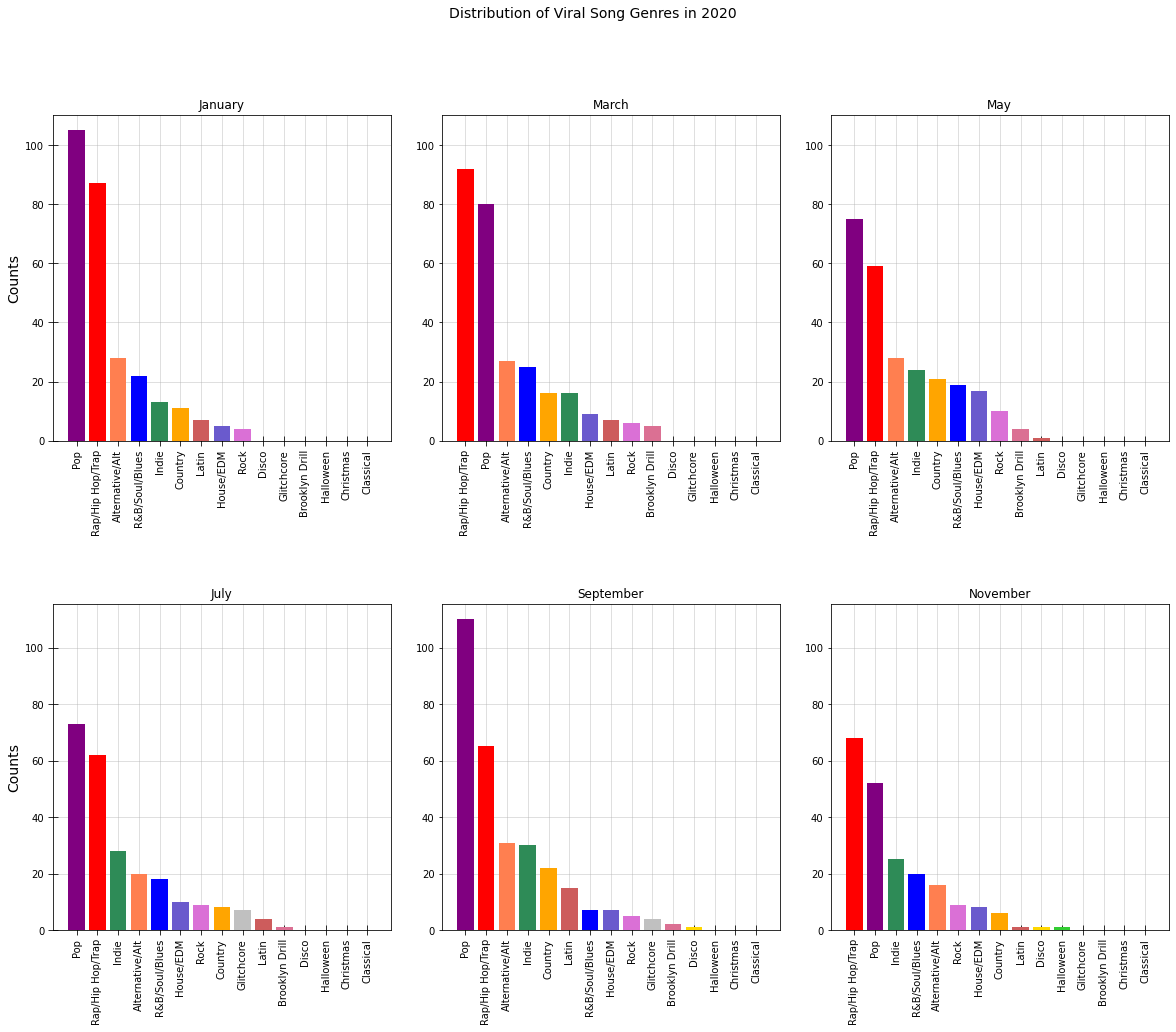

In [159]:
jan_x = sorted_jan_viral_genre_df['Genre']
jan_y = sorted_jan_viral_genre_df['Count']

mar_x = sorted_mar_viral_genre_df['Genre']
mar_y = sorted_mar_viral_genre_df['Count']

may_x = sorted_may_viral_genre_df['Genre']
may_y = sorted_may_viral_genre_df['Count']

jul_x = sorted_jul_viral_genre_df['Genre']
jul_y = sorted_jul_viral_genre_df['Count']

sep_x = sorted_sep_viral_genre_df['Genre']
sep_y = sorted_sep_viral_genre_df['Count']

nov_x = sorted_nov_viral_genre_df['Genre']
nov_y = sorted_nov_viral_genre_df['Count']

# fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(2,3, sharey=True)
fig = plt.figure(figsize = (20, 15))
fig.add_axes()

ax1 = fig.add_subplot(231)
ax1.bar(jan_x, jan_y, color=jan_colors, zorder=2)
ax1.grid(alpha=0.5, zorder=0)
ax1.xaxis.set(ticks=range(len(jan_x)))
# ax1.setxticklabels(jan_x, rotation=90)
ax1.tick_params(axis='y', direction='inout', length=10)
ax1.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax1.set(title="January")
# ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylabel('Counts', fontsize=14)

ax2 = fig.add_subplot(232, sharey=ax1)
ax2.bar(mar_x, mar_y, color=mar_colors, zorder=2)
ax2.grid(alpha=0.5, zorder=0)
ax2.xaxis.set(ticks=range(len(mar_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax2.tick_params(axis='y', direction='inout', length=10)
ax2.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax2.set(title="March")
# ax2.set_xlabel('Genre', fontsize=14)
# ax2.set_ylabel('Counts', fontsize=14)


ax3 = fig.add_subplot(233, sharey=ax1)
ax3.bar(may_x, may_y, color=may_colors, zorder=2)
ax3.grid(alpha=0.5, zorder=0)
ax3.xaxis.set(ticks=range(len(may_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax3.tick_params(axis='y', direction='inout', length=10)
ax3.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax3.set(title="May")
# ax3.set_xlabel('Genre', fontsize=14)
# ax3.set_ylabel('Counts', fontsize=14)


ax4 = fig.add_subplot(234)
ax4.bar(jul_x, jul_y, color=jul_colors, zorder=2)
ax4.grid(alpha=0.5, zorder=0)
ax4.xaxis.set(ticks=range(len(jul_x)))
# ax1.setxticklabels(jan_x, rotation=90)
ax4.tick_params(axis='y', direction='inout', length=10)
ax4.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax4.set(title="July")
# ax4.set_xlabel('Genre', fontsize=14)
ax4.set_ylabel('Counts', fontsize=14)


ax5 = fig.add_subplot(235, sharey=ax4)
ax5.bar(sep_x, sep_y, color=sep_colors, zorder=2)
ax5.grid(alpha=0.5, zorder=0)
ax5.xaxis.set(ticks=range(len(sep_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax5.tick_params(axis='y', direction='inout', length=10)
ax5.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax5.set(title="September")
# ax5.set_xlabel('Genre', fontsize=14)
# ax5.set_ylabel('Counts', fontsize=14)


ax6 = fig.add_subplot(236, sharey=ax4)
ax6.bar(nov_x, nov_y, color=nov_colors, zorder=2)
ax6.grid(alpha=0.5, zorder=0)
ax6.xaxis.set(ticks=range(len(nov_x)))
# ax1.setxticklabels(jan_x, rotation=90)
# ax6.tick_params(axis='y', direction='inout', length=10)
ax6.tick_params(axis='x', direction='inout', length=10, labelrotation=90)
ax6.set(title="November")
# ax6.set_xlabel('Genre', fontsize=12)
# ax6.set_ylabel('Counts', fontsize=14)

fig.suptitle('Distribution of Viral Song Genres in 2020', fontsize=14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.5)
# plt.bar(names, values, color=['red', 'blue', 'purple', 'orchid', 'orange', 'indianred', 'gold', 'seagreen', 'slateblue', 'coral', 'silver', 'palevioletred', 'limegreen'], zorder=2)
# plt.xticks(rotation=90, size=14)
# plt.grid(alpha=0.5, zorder=0)
# plt.yticks(size=14)
# plt.ylabel("Counts", size=14)
# plt.title("Total Distribution of Viral Song Genres for Sampled Months in 2020", size=18)
# plt.setp(axa.xaxis.get_majorticklabels(), rotation=95)
# plt.subplot(221)

plt.gcf()
plt.show()
fig.savefig('Images/total_months_viral_genre.jpg', facecolor='w', dpi=400)

In [160]:


# Unemployment Data

In [161]:
new_ui_df = pd.read_csv("csv files\\new_ui.csv")

week_num = new_ui_df["Week Number"].tolist()
print(week_num)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [162]:
streams_all = pd.read_csv('csv files/top200_all_months.csv')
streams_all = streams_all.drop(["Unnamed: 0"], axis=1)

streams_all.head()

,Unnamed: 0.1.1,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,0.0,1,WAP (feat. Megan Thee Stallion),Cardi B,15398897,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,4kYSro6naA4h99UJvo89HB,pop,pop rap,post-teen pop
1,1.0,2,Mood (feat. iann dior),24kGoldn,10323110,https://open.spotify.com/track/3tjFYV6RSFtuktY...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,6fWVd57NKTalqvmjRd2t8Z,cali rap,unspecified,unspecified
2,2.0,3,Laugh Now Cry Later (feat. Lil Durk),Drake,9934418,https://open.spotify.com/track/2SAqBLGA283SUiw...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,3TVXtAsR1Inumwj472S9r4,canadian hip hop,canadian pop,hip hop
3,3.0,4,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,7522385,https://open.spotify.com/track/0PvFJmanyNQMseI...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,0eDvMgVFoNV3TpwtrVCoTj,brooklyn drill,unspecified,unspecified
4,4.0,5,"Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money,6743659,https://open.spotify.com/track/2DQNYMRjisN3KAP...,regional-us-weekly-2020-09-04--2020-09-11.csv,September,36,Top 200,2020-09-04,6MPCFvOQv5cIGfw3jODMF0,pop rap,rap,trap


In [163]:
streams_all_sum = streams_all.groupby('Week Number')['Streams'].sum()
print(streams_all_sum)

Week Number
1     568732447
2     630848180
3     699004731
4     608490489
9     632716011
10    690261593
11    590879939
12    572606856
18    567969812
19    525600167
20    532625341
21    522477928
27    512651814
28    637517013
29    541592640
30    659279693
36    510979316
37    494926568
38    493853348
39    508319217
45    482611166
46    483252803
47    514674608
48    543690539
Name: Streams, dtype: int64


In [164]:
num_streams = streams_all_sum.astype(float).to_list()
weeks = pd.DataFrame(streams_all.groupby('Week Number').count())
print(num_streams)
weeks.head()

[568732447.0, 630848180.0, 699004731.0, 608490489.0, 632716011.0, 690261593.0, 590879939.0, 572606856.0, 567969812.0, 525600167.0, 532625341.0, 522477928.0, 512651814.0, 637517013.0, 541592640.0, 659279693.0, 510979316.0, 494926568.0, 493853348.0, 508319217.0, 482611166.0, 483252803.0, 514674608.0, 543690539.0]


,Unnamed: 0.1.1,Position,Track Name,Artist,Streams,URL,Filename,Month,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
Week Number,,,,,,,,,,,,,,
1,0,200,200,200,200,200,200,200,200,200,200,200,200,200
2,0,200,200,200,200,200,200,200,200,200,200,200,200,200
3,0,200,200,200,200,200,200,200,200,200,200,200,200,200
4,0,200,200,200,200,200,200,200,200,200,200,200,200,200
9,0,200,200,200,200,200,200,200,200,200,200,200,200,200


In [165]:
weeks = weeks.reset_index()
weeks_list = weeks['Week Number'].to_list()
print(weeks_list)
print(len(num_streams))
print(len(weeks_list))

[1, 2, 3, 4, 9, 10, 11, 12, 18, 19, 20, 21, 27, 28, 29, 30, 36, 37, 38, 39, 45, 46, 47, 48]
24
24


<ipython-input-166-b63312a78f12>:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  fig.add_axes()


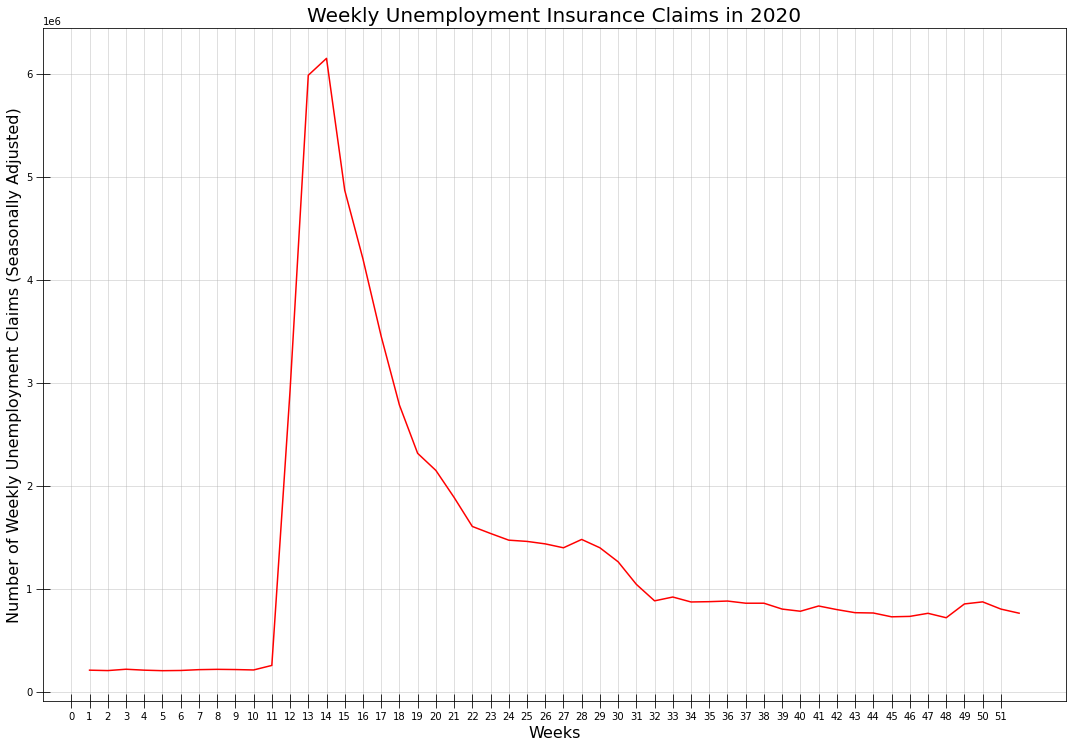

In [166]:
x_UI= week_num
y_UI= new_ui_df['S.A.']

fig = plt.figure(figsize = (15, 20))
fig.add_axes()

ax1 = fig.add_subplot(211)
ax1.plot(x_UI, y_UI, zorder=2, color='red')
ax1.grid(alpha=0.5, zorder=0)
ax1.xaxis.set(ticks=range(len(x_UI)))


ax1.set_xlabel('Weeks', fontsize=16)

ax1.tick_params(axis='y', direction='inout', length=10, size=14)
ax1.tick_params(axis='x', direction='inout', length=10, size=14)
# ax1.set(title="Weekly Unemployment Insurance Claims in 2020")
ax1.set_title('Weekly Unemployment Insurance Claims in 2020', fontsize=20)

ax1.set_ylabel('Number of Weekly Unemployment Claims (Seasonally Adjusted)', fontsize=16)

# plt.gcf().set_size_inches(20,20)
plt.tight_layout()
fig.savefig('Images/2020_Weekly_UI.png', facecolor='w', dpi=600)
plt.show()

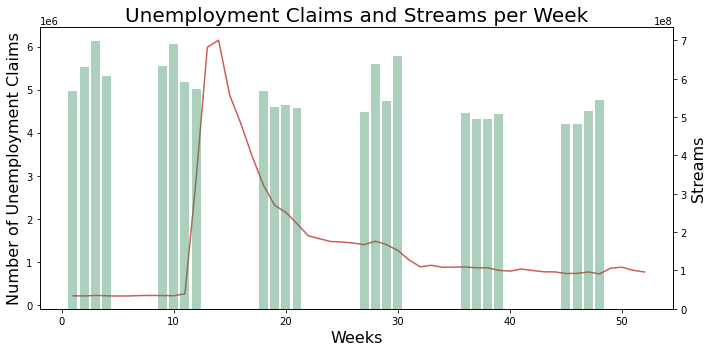

In [167]:
# Combine bar graph of streams per week and line graph of unemplyment claims


#https://www.geeksforgeeks.org/how-to-add-a-y-axis-label-to-the-secondary-y-axis-in-matplotlib/
x = week_num
x2 = weeks_list
# y-axis values
y1 = new_ui_df['S.A.']
  
# secondary y-axis values
y2 = num_streams
  
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Unemployment Claims and Streams per Week', size=20)
  
# using the twinx() for creating another
# axes object for secondry y-Axis
ax2 = ax.twinx()
ax.plot(x, y1, color = 'indianred', alpha=1)
ax2.bar(x2, y2, color = 'seagreen', alpha=0.4)
  
# giving labels to the axises
ax.set_xlabel('Weeks', size=16)
ax.set_ylabel('Number of Unemployment Claims', size=16)
  
# secondary y-axis label
ax2.set_ylabel('Streams', size=16)
  
# defining display layout 
plt.tight_layout()
  
# show plot


fig.savefig('Images/2020_Weekly_UIvsStreams.png', facecolor='w', dpi=600)
plt.show()

In [168]:


# Create correlation and scatter plot for UI vs streams per week


claims_ui=[]
all_wks_claims = new_ui_df['S.A.'].astype(float).to_list()
print(all_wks_claims)

[210000.0, 206000.0, 219000.0, 210000.0, 205000.0, 207000.0, 215000.0, 218000.0, 216000.0, 212000.0, 256000.0, 2923000.0, 5985000.0, 6149000.0, 4869000.0, 4202000.0, 3451000.0, 2784000.0, 2315000.0, 2149000.0, 1887000.0, 1605000.0, 1537000.0, 1472000.0, 1460000.0, 1436000.0, 1398000.0, 1479000.0, 1398000.0, 1262000.0, 1043000.0, 883000.0, 920000.0, 872000.0, 875000.0, 881000.0, 860000.0, 860000.0, 803000.0, 782000.0, 833000.0, 798000.0, 768000.0, 765000.0, 728000.0, 732000.0, 762000.0, 719000.0, 853000.0, 873000.0, 803000.0, 763000.0]


In [169]:
songs_week_list = weeks['Week Number'].to_list()
print(songs_week_list)

[1, 2, 3, 4, 9, 10, 11, 12, 18, 19, 20, 21, 27, 28, 29, 30, 36, 37, 38, 39, 45, 46, 47, 48]


In [170]:
print(len(week_num))

52


In [171]:
week_claim_dict = dict(zip(week_num, all_wks_claims))
print(week_claim_dict)

{1: 210000.0, 2: 206000.0, 3: 219000.0, 4: 210000.0, 5: 205000.0, 6: 207000.0, 7: 215000.0, 8: 218000.0, 9: 216000.0, 10: 212000.0, 11: 256000.0, 12: 2923000.0, 13: 5985000.0, 14: 6149000.0, 15: 4869000.0, 16: 4202000.0, 17: 3451000.0, 18: 2784000.0, 19: 2315000.0, 20: 2149000.0, 21: 1887000.0, 22: 1605000.0, 23: 1537000.0, 24: 1472000.0, 25: 1460000.0, 26: 1436000.0, 27: 1398000.0, 28: 1479000.0, 29: 1398000.0, 30: 1262000.0, 31: 1043000.0, 32: 883000.0, 33: 920000.0, 34: 872000.0, 35: 875000.0, 36: 881000.0, 37: 860000.0, 38: 860000.0, 39: 803000.0, 40: 782000.0, 41: 833000.0, 42: 798000.0, 43: 768000.0, 44: 765000.0, 45: 728000.0, 46: 732000.0, 47: 762000.0, 48: 719000.0, 49: 853000.0, 50: 873000.0, 51: 803000.0, 52: 763000.0}


In [172]:
# to find only the claims number that match the same week in the songs
for x, y in week_claim_dict.items():
    n = 0
    for n in range(len(songs_week_list)):
        if x == songs_week_list[n]:
            claims_ui.append(int(y))
            break

In [173]:
print(claims_ui)
print(len(claims_ui))
# print(claims_ui[0].type())
print(len(weeks_list))
print(num_streams)

[210000, 206000, 219000, 210000, 216000, 212000, 256000, 2923000, 2784000, 2315000, 2149000, 1887000, 1398000, 1479000, 1398000, 1262000, 881000, 860000, 860000, 803000, 728000, 732000, 762000, 719000]
24
24
[568732447.0, 630848180.0, 699004731.0, 608490489.0, 632716011.0, 690261593.0, 590879939.0, 572606856.0, 567969812.0, 525600167.0, 532625341.0, 522477928.0, 512651814.0, 637517013.0, 541592640.0, 659279693.0, 510979316.0, 494926568.0, 493853348.0, 508319217.0, 482611166.0, 483252803.0, 514674608.0, 543690539.0]


The line equation is y = -21 x + 586337913.9
The r-squared is: 0.07
<ipython-input-174-397d744deb72>:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgcolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Images/correlation.jpg', facecolor='w', edgcolor='w', dpi=600)


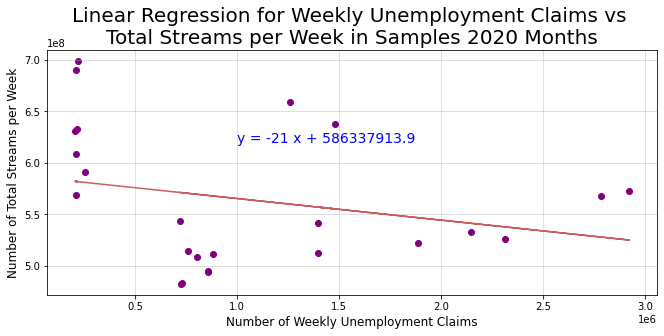

In [174]:
x = np.array([210000, 206000, 219000, 210000, 216000, 212000, 256000, 2923000, 2784000, 2315000, 2149000, 1887000, 1398000, 1479000, 1398000, 1262000, 881000, 860000, 860000, 803000, 728000, 732000, 762000, 719000])
y= np.array([568732447.0, 630848180.0, 699004731.0, 608490489.0, 632716011.0, 690261593.0, 590879939.0, 572606856.0, 567969812.0, 525600167.0, 532625341.0, 522477928.0, 512651814.0, 637517013.0, 541592640.0, 659279693.0, 510979316.0, 494926568.0, 493853348.0, 508319217.0, 482611166.0, 483252803.0, 514674608.0, 543690539.0])

(slope,intercept,r_value,pvalue,stderr)=st.linregress(x,y)
slope = int(slope)
regress_values=x*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x,y, color='purple')
ax = plt.plot(x,regress_values,"indianred")
ax = plt.text(1000000,620000000, line_eq, size=14, color='b')
plt.xlabel('Number of Weekly Unemployment Claims', size=12)
plt.ylabel('Number of Total Streams per Week', size=12)
plt.tight_layout(pad=3.5)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Weekly Unemployment Claims vs \nTotal Streams per Week in Samples 2020 Months', size=20)

print(f"The r-squared is: {r_value**2:.2f}")
plt.savefig('Images/correlation.jpg', facecolor='w', edgcolor='w', dpi=600)
plt.show()

In [175]:
### End Rosa